In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import emcee
import sys
%matplotlib inline

In [2]:
b = phoebe.default_binary(contact_binary = True)

In [3]:
#b.add_constraint('semidetached', 'primary')

In [4]:
#b.add_constraint('semidetached', 'secondary')

In [5]:
b['period@orbit'] = 1
b['sma@orbit'] = 1
#b['q@binary'] = 0.44
# b['incl@orbit'] = 83.5
# b['requiv@primary'] = 1.2
# b['requiv@secondary'] = 0.8
#b['teff@primary'] = 5660.
# b['teff@secondary'] = 5500.

In [6]:
#lc = np.loadtxt('data.lc')
v737 = np.loadtxt('v737per.B')
vdata = v737[:,1]
flux = vdata/(-2.5)
flux10 = 10**flux
lc = v737
lc[:,1] = flux10

In [7]:
b.add_dataset('lc', times=lc[:,0], fluxes=lc[:,1], sigmas=0.05*np.ones(len(lc)), passband='Johnson:B')

<ParameterSet: 78 parameters | contexts: figure, dataset, compute, constraint>

In [8]:
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()
b.set_value_all('irrad_method', 'none')

In [9]:
b.flip_constraint('compute_phases', 'compute_times')
b['compute_phases@lc@dataset'] = np.linspace(-0.5,0.5,len(lc))

In [10]:
def lnprob(x, adjpars, priors):
    #Check to see that all values are within the allowed limits:
    if not np.all([priors[i][0] < x[i] < priors[i][1] for i in range(len(priors))]):
         return -np.inf

    for i in range(len(adjpars)):
        b[adjpars[i]] = x[i]
    
    # Let's assume that our priors are uniform on the range of the physical parameter combinations.
    # This is already handled in Phoebe, which will throw an error if the system is not physical,
    # therefore it's easy to implement the lnprior as =0 when system checks pass and =-inf if they don't.
    # Here we'll 'package' this in a simple try/except statement:
    
    try:
        b.run_compute(irrad_method='none')

        # sum of squares of the residuals
        fluxes_model = b['fluxes@model'].interp_value(times=lc[:,0])
        #lnp = -0.5*np.sum((fluxes_model-b['value@fluxes@dataset'])**2 / b['value@sigmas@dataset']**2)
        mag_model = -2.5*np.log10(fluxes_model) 
        mag_model = mag_model-np.mean(mag_model)
        mag_value = -2.5*np.log10(b['value@fluxes@dataset'])
        mag_value = mag_value-np.mean(mag_value)
        lnp = -0.5*np.sum((mag_model-mag_value)**2 / b['value@sigmas@dataset']**2)
        
        #print('inp is ok!')

    except:
        lnp = -np.inf

    sys.stderr.write("lnp = %e\n" % (lnp))

    return lnp

In [11]:
from scipy.stats import norm
def run(adjpars, priors, nwalkers, niter):
    ndim = len(adjpars)

   

    p0 = np.array([[p[0] + (p[1]-p[0])*np.random.rand() for p in priors] for i in range(nwalkers)])

#     pool = MPIPool()
#     if not pool.is_master():
#         pool.wait()
#         sys.exit(0)

    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[adjpars, priors])

    pos, prob, state = sampler.run_mcmc(p0, niter)
    
    print(p0)
    
    for i in range(ndim):
        plt.figure()
        y = sampler.flatchain[:,i]
        n, bins, patches = plt.hist(y, 200, density=1, color="b", alpha=0.45)
        plt.title("Dimension {0:d}".format(i))
        
        mu = np.average(y)
        sigma = np.std(y)       
        print ("mu,", "sigma = ", mu, sigma)

        bf = norm.pdf(bins, mu, sigma)
        l = plt.plot(bins, bf, 'k--', linewidth=2.0)

    #plt.show()
    
    return pos

#     pool.close()



100%|██████████| 310/310 [00:10<00:00, 30.99it/s]
lnp = -7.368666e+02
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -1.261267e+02
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.76it/s]
lnp = -1.091054e+02
100%|██████████| 310/310 [00:10<00:00, 30.12it/s]
lnp = -1.767076e+02
lnp = -inf
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.40it/s]
lnp = -4.210650e+02
100%|██████████| 310/310 [00:10<00:00, 29.92it/s]
lnp = -1.936154e+02
100%|██████████| 310/310 [00:10<00:00, 30.71it/s]
lnp = -5.686707e+02
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.45it/s]
lnp = -1.110526e+02
lnp = -inf
100%|██████████| 310/310 [00:11<00:00, 28.09it/s]
lnp = -4.934523e+01
100%|██████████| 310/310 [00:10<00:00, 29.48it/s]
lnp = -9.211185e+01
100%|██████████| 310/310 [00:10<00:00, 30.78it/s]
lnp = -4.441654e+02
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.85it/s]
lnp = -1.977344e+02
100%|██████████| 310/310 [00:10<00:00, 30.44it/s]
lnp = -2.142313e+02
10

100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -1.528570e+02
100%|██████████| 310/310 [00:10<00:00, 30.90it/s]
lnp = -1.006378e+02
100%|██████████| 310/310 [00:10<00:00, 29.66it/s]
lnp = -7.039629e+01
100%|██████████| 310/310 [00:10<00:00, 30.56it/s]
lnp = -4.805624e+01
100%|██████████| 310/310 [00:09<00:00, 31.04it/s]
lnp = -9.838689e+01
100%|██████████| 310/310 [00:10<00:00, 30.41it/s]
lnp = -5.956454e+01
100%|██████████| 310/310 [00:09<00:00, 31.85it/s]
lnp = -4.026815e+02
100%|██████████| 310/310 [00:10<00:00, 29.76it/s]
lnp = -4.622310e+01
100%|██████████| 310/310 [00:10<00:00, 30.96it/s]
lnp = -3.526004e+02
100%|██████████| 310/310 [00:10<00:00, 30.08it/s]
lnp = -3.040711e+02
100%|██████████| 310/310 [00:10<00:00, 30.40it/s]
lnp = -2.527151e+02
100%|██████████| 310/310 [00:10<00:00, 29.52it/s]
lnp = -5.011021e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -5.663698e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -1.170438e+02
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.34it/s]
lnp = -4.616060e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -3.625201e+02
100%|██████████| 310/310 [00:10<00:00, 29.51it/s]
lnp = -7.572117e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -2.078093e+02
100%|██████████| 310/310 [00:10<00:00, 30.78it/s]
lnp = -4.765037e+01
100%|██████████| 310/310 [00:10<00:00, 29.40it/s]
lnp = -5.583725e+01
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -7.426367e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.60it/s]
lnp = -4.685912e+01
100%|██████████| 310/310 [00:10<00:00, 30.84it/s]
lnp = -3.168708e+02
100%|██████████| 310/310 [00:10<00:00, 30.45it/s]
lnp = -8.296481e+01
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -8.278722e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.10it/s]
lnp = -1.137023e+02
100%|██████████| 310/310 [00:10<00:00, 30.08it/s]
lnp = -5.225940e+01
100%|██████████| 310/310 [00:10<00:00, 30.52it

lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.94it/s]
lnp = -6.558324e+01
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -6.510438e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.10it/s]
lnp = -5.740655e+01
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -5.118975e+01
100%|██████████| 310/310 [00:10<00:00, 30.02it/s]
lnp = -5.606277e+01
100%|██████████| 310/310 [00:10<00:00, 29.84it/s]
lnp = -4.426458e+01
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -5.655529e+01
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.541339e+01
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -1.718928e+02
100%|██████████| 310/310 [00:10<00:00, 30.36it/s]
lnp = -4.362363e+01
100%|██████████| 310/310 [00:10<00:00, 29.74it/s]
lnp = -4.835366e+01
100%|██████████| 310/310 [00:10<00:00, 29.18it/s]
lnp = -5.138785e+01
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -4.483880e+01
100%|██████████| 310/310 [00:10<00:00, 30.14it/s]
lnp = -1.061653e+0

100%|██████████| 310/310 [00:10<00:00, 29.60it/s]
lnp = -4.592523e+01
100%|██████████| 310/310 [00:10<00:00, 28.52it/s]
lnp = -4.639370e+01
100%|██████████| 310/310 [00:10<00:00, 30.44it/s]
lnp = -4.397976e+01
100%|██████████| 310/310 [00:10<00:00, 29.58it/s]
lnp = -4.255366e+01
100%|██████████| 310/310 [00:10<00:00, 29.51it/s]
lnp = -4.318846e+01
100%|██████████| 310/310 [00:10<00:00, 28.77it/s]
lnp = -4.332324e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.38it/s]
lnp = -4.577626e+01
100%|██████████| 310/310 [00:10<00:00, 28.86it/s]
lnp = -4.721648e+01
100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -4.301928e+01
100%|██████████| 310/310 [00:10<00:00, 29.76it/s]
lnp = -4.368997e+01
100%|██████████| 310/310 [00:10<00:00, 28.69it/s]
lnp = -7.265143e+01
100%|██████████| 310/310 [00:10<00:00, 28.93it/s]
lnp = -4.252815e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.42it/s]
lnp = -4.393010e+01
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -6.701562e+0

100%|██████████| 310/310 [00:10<00:00, 28.46it/s]
lnp = -4.387621e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.31it/s]
lnp = -4.647088e+01
100%|██████████| 310/310 [00:10<00:00, 29.05it/s]
lnp = -4.190389e+01
100%|██████████| 310/310 [00:10<00:00, 29.04it/s]
lnp = -4.708529e+01
100%|██████████| 310/310 [00:10<00:00, 30.29it/s]
lnp = -5.315071e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.92it/s]
lnp = -4.210275e+01
100%|██████████| 310/310 [00:10<00:00, 28.44it/s]
lnp = -4.537575e+01
100%|██████████| 310/310 [00:10<00:00, 29.02it/s]
lnp = -4.403575e+01
100%|██████████| 310/310 [00:10<00:00, 29.87it/s]
lnp = -4.498707e+01
100%|██████████| 310/310 [00:10<00:00, 28.55it/s]
lnp = -4.806808e+01
100%|██████████| 310/310 [00:10<00:00, 30.48it/s]
lnp = -1.276258e+02
100%|██████████| 310/310 [00:10<00:00, 29.60it/s]
lnp = -4.356694e+01
100%|██████████| 310/310 [00:10<00:00, 30.12it/s]
lnp = -4.476662e+01
100%|██████████| 310/310 [00:10<00:00, 29.78it/s]
lnp = -4.306385e+0

100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.595599e+01
100%|██████████| 310/310 [00:10<00:00, 29.21it/s]
lnp = -4.716300e+01
100%|██████████| 310/310 [00:10<00:00, 30.13it/s]
lnp = -8.229104e+01
100%|██████████| 310/310 [00:10<00:00, 29.41it/s]
lnp = -4.621156e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.518238e+01
100%|██████████| 310/310 [00:10<00:00, 29.35it/s]
lnp = -4.579841e+01
100%|██████████| 310/310 [00:10<00:00, 28.50it/s]
lnp = -4.520915e+01
100%|██████████| 310/310 [00:11<00:00, 27.28it/s]
lnp = -4.630094e+01
100%|██████████| 310/310 [00:10<00:00, 29.23it/s]
lnp = -4.514233e+01
100%|██████████| 310/310 [00:10<00:00, 29.80it/s]
lnp = -4.423442e+01
100%|██████████| 310/310 [00:10<00:00, 29.94it/s]
lnp = -4.274721e+01
100%|██████████| 310/310 [00:10<00:00, 30.16it/s]
lnp = -4.656474e+01
100%|██████████| 310/310 [00:10<00:00, 30.96it/s]
lnp = -4.427713e+01
100%|██████████| 310/310 [00:10<00:00, 30.16it/s]
lnp = -4.297328e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.29it/s]
lnp = -4.259873e+01
100%|██████████| 310/310 [00:10<00:00, 29.43it/s]
lnp = -4.190332e+01
100%|██████████| 310/310 [00:10<00:00, 29.92it/s]
lnp = -4.934976e+01
100%|██████████| 310/310 [00:10<00:00, 29.94it/s]
lnp = -4.855135e+01
100%|██████████| 310/310 [00:10<00:00, 30.13it/s]
lnp = -5.824717e+01
100%|██████████| 310/310 [00:10<00:00, 29.71it/s]
lnp = -4.265524e+01
100%|██████████| 310/310 [00:10<00:00, 29.14it/s]
lnp = -4.132823e+01
100%|██████████| 310/310 [00:10<00:00, 30.64it/s]
lnp = -4.397733e+01
100%|██████████| 310/310 [00:10<00:00, 29.66it/s]
lnp = -4.400983e+01
100%|██████████| 310/310 [00:10<00:00, 29.07it/s]
lnp = -4.382987e+01
100%|██████████| 310/310 [00:10<00:00, 29.73it/s]
lnp = -4.666377e+01
100%|██████████| 310/310 [00:10<00:00, 29.24it/s]
lnp = -4.338648e+01
100%|██████████| 310/310 [00:10<00:00, 30.46it/s]
lnp = -4.543382e+01
lnp = -inf
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -

100%|██████████| 310/310 [00:12<00:00, 25.29it/s]
lnp = -4.377412e+01
100%|██████████| 310/310 [00:12<00:00, 24.75it/s]
lnp = -4.457199e+01
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 24.69it/s]
lnp = -4.461571e+01
100%|██████████| 310/310 [00:12<00:00, 24.61it/s]
lnp = -4.556451e+01
100%|██████████| 310/310 [00:12<00:00, 25.09it/s]
lnp = -4.843019e+01
100%|██████████| 310/310 [00:12<00:00, 25.25it/s]
lnp = -4.169015e+01
100%|██████████| 310/310 [00:12<00:00, 24.83it/s]
lnp = -4.394076e+01
100%|██████████| 310/310 [00:12<00:00, 25.64it/s]
lnp = -4.454327e+01
100%|██████████| 310/310 [00:12<00:00, 25.10it/s]
lnp = -4.416298e+01
100%|██████████| 310/310 [00:12<00:00, 24.52it/s]
lnp = -4.531839e+01
100%|██████████| 310/310 [00:12<00:00, 24.42it/s]
lnp = -4.792741e+01
100%|██████████| 310/310 [00:12<00:00, 24.89it/s]
lnp = -4.344738e+01
100%|██████████| 310/310 [00:12<00:00, 25.09it/s]
lnp = -4.437974e+01
100%|██████████| 310/310 [00:12<00:00, 25.39it/s]
lnp = -4.340016e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.61it/s]
lnp = -4.412677e+01
100%|██████████| 310/310 [00:10<00:00, 29.78it/s]
lnp = -4.288075e+01
100%|██████████| 310/310 [00:10<00:00, 29.74it/s]
lnp = -4.760016e+01
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.332378e+01
100%|██████████| 310/310 [00:10<00:00, 30.31it/s]
lnp = -4.334170e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.360022e+01
100%|██████████| 310/310 [00:10<00:00, 29.58it/s]
lnp = -4.299631e+01
100%|██████████| 310/310 [00:10<00:00, 29.25it/s]
lnp = -4.398444e+01
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.606307e+01
100%|██████████| 310/310 [00:10<00:00, 29.53it/s]
lnp = -4.616319e+01
100%|██████████| 310/310 [00:10<00:00, 29.83it/s]
lnp = -4.414608e+01
100%|██████████| 310/310 [00:10<00:00, 30.02it/s]
lnp = -4.281823e+01
100%|██████████| 310/310 [00:10<00:00, 29.09it/s]
lnp = -4.544323e+01
100%|██████████| 310/310 [00:10<00:00, 28.65it/s]
lnp = -4.433543e+01
lnp = -inf
100%|████

100%|██████████| 310/310 [00:12<00:00, 25.19it/s]
lnp = -4.423238e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 25.63it/s]
lnp = -4.268257e+01
100%|██████████| 310/310 [00:12<00:00, 25.31it/s]
lnp = -4.396269e+01
100%|██████████| 310/310 [00:12<00:00, 25.15it/s]
lnp = -4.822667e+01
100%|██████████| 310/310 [00:12<00:00, 25.44it/s]
lnp = -4.565451e+01
100%|██████████| 310/310 [00:12<00:00, 24.67it/s]
lnp = -4.522407e+01
100%|██████████| 310/310 [00:12<00:00, 24.56it/s]
lnp = -4.288913e+01
100%|██████████| 310/310 [00:12<00:00, 25.79it/s]
lnp = -4.294428e+01
100%|██████████| 310/310 [00:12<00:00, 24.44it/s]
lnp = -4.558138e+01
100%|██████████| 310/310 [00:12<00:00, 25.11it/s]
lnp = -4.522285e+01
100%|██████████| 310/310 [00:11<00:00, 25.88it/s]
lnp = -4.914604e+01
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 24.76it/s]
lnp = -4.401192e+01
100%|██████████| 310/310 [00:12<00:00, 25.08it/s]
lnp = -4.323987e+01
100%|██████████| 310/310 [00:12<00:00, 24.68it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.56it/s]
lnp = -4.430816e+01
100%|██████████| 310/310 [00:10<00:00, 29.48it/s]
lnp = -4.419806e+01
100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -4.256109e+01
100%|██████████| 310/310 [00:10<00:00, 29.45it/s]
lnp = -4.279414e+01
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -5.450568e+01
100%|██████████| 310/310 [00:10<00:00, 29.07it/s]
lnp = -4.571334e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -4.495734e+01
100%|██████████| 310/310 [00:10<00:00, 29.64it/s]
lnp = -4.268370e+01
100%|██████████| 310/310 [00:10<00:00, 29.43it/s]
lnp = -4.191451e+01
100%|██████████| 310/310 [00:10<00:00, 29.77it/s]
lnp = -4.297270e+01
100%|██████████| 310/310 [00:10<00:00, 28.51it/s]
lnp = -4.343447e+01
100%|██████████| 310/310 [00:10<00:00, 29.48it/s]
lnp = -4.271016e+01
100%|██████████| 310/310 [00:10<00:00, 30.46it/s]
lnp = -4.560427e+01
100%|██████████| 310/310 [00:10<00:00, 29.69it/s]
lnp = -4.361581e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 28.97it/s]
lnp = -4.351942e+01
100%|██████████| 310/310 [00:10<00:00, 29.58it/s]
lnp = -4.280836e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.38it/s]
lnp = -4.463527e+01
100%|██████████| 310/310 [00:10<00:00, 29.02it/s]
lnp = -4.435545e+01
100%|██████████| 310/310 [00:10<00:00, 29.51it/s]
lnp = -4.437518e+01
100%|██████████| 310/310 [00:10<00:00, 30.18it/s]
lnp = -4.240217e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.599873e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.448060e+01
100%|██████████| 310/310 [00:10<00:00, 29.26it/s]
lnp = -4.686953e+01
100%|██████████| 310/310 [00:10<00:00, 28.57it/s]
lnp = -4.520897e+01
100%|██████████| 310/310 [00:10<00:00, 29.22it/s]
lnp = -4.778432e+01
100%|██████████| 310/310 [00:10<00:00, 29.61it/s]
lnp = -5.238451e+01
100%|██████████| 310/310 [00:11<00:00, 27.65it/s]
lnp = -4.253531e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.166867e+0

100%|██████████| 310/310 [00:10<00:00, 29.73it/s]
lnp = -4.479523e+01
100%|██████████| 310/310 [00:10<00:00, 29.43it/s]
lnp = -4.309312e+01
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.988801e+01
100%|██████████| 310/310 [00:10<00:00, 29.78it/s]
lnp = -4.329484e+01
100%|██████████| 310/310 [00:10<00:00, 30.18it/s]
lnp = -5.318551e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.467291e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.50it/s]
lnp = -4.331026e+01
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.251231e+01
100%|██████████| 310/310 [00:10<00:00, 29.87it/s]
lnp = -4.730559e+01
100%|██████████| 310/310 [00:10<00:00, 29.34it/s]
lnp = -4.319681e+01
100%|██████████| 310/310 [00:11<00:00, 27.99it/s]
lnp = -4.391214e+01
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.240433e+01
100%|██████████| 310/310 [00:10<00:00, 29.52it/s]
lnp = -4.285702e+01
100%|██████████| 310/310 [00:10<00:00, 29.02it/s]
lnp = -4.428608e+0

100%|██████████| 310/310 [00:10<00:00, 29.11it/s]
lnp = -4.164503e+01
100%|██████████| 310/310 [00:10<00:00, 29.34it/s]
lnp = -4.675618e+01
100%|██████████| 310/310 [00:10<00:00, 29.72it/s]
lnp = -4.264517e+01
100%|██████████| 310/310 [00:10<00:00, 28.33it/s]
lnp = -4.663050e+01
100%|██████████| 310/310 [00:10<00:00, 29.20it/s]
lnp = -4.577129e+01
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.270260e+01
100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -4.452414e+01
100%|██████████| 310/310 [00:10<00:00, 28.20it/s]
lnp = -4.269843e+01
100%|██████████| 310/310 [00:10<00:00, 28.67it/s]
lnp = -4.458431e+01
100%|██████████| 310/310 [00:10<00:00, 29.71it/s]
lnp = -4.571732e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.71it/s]
lnp = -4.239879e+01
100%|██████████| 310/310 [00:10<00:00, 29.33it/s]
lnp = -4.374107e+01
100%|██████████| 310/310 [00:10<00:00, 29.32it/s]
lnp = -5.141126e+01
100%|██████████| 310/310 [00:10<00:00, 28.82it/s]
lnp = -4.229226e+01
100%|████

lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.73it/s]
lnp = -4.500553e+01
100%|██████████| 310/310 [00:10<00:00, 29.02it/s]
lnp = -4.345568e+01
100%|██████████| 310/310 [00:10<00:00, 28.42it/s]
lnp = -4.227972e+01
100%|██████████| 310/310 [00:10<00:00, 29.97it/s]
lnp = -4.240043e+01
100%|██████████| 310/310 [00:10<00:00, 29.92it/s]
lnp = -4.316808e+01
100%|██████████| 310/310 [00:10<00:00, 29.33it/s]
lnp = -4.371127e+01
100%|██████████| 310/310 [00:10<00:00, 29.24it/s]
lnp = -4.377074e+01
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.173467e+01
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.381959e+01
100%|██████████| 310/310 [00:10<00:00, 29.48it/s]
lnp = -4.483973e+01
100%|██████████| 310/310 [00:10<00:00, 29.72it/s]
lnp = -4.806243e+01
100%|██████████| 310/310 [00:10<00:00, 29.06it/s]
lnp = -4.330616e+01
100%|██████████| 310/310 [00:10<00:00, 29.33it/s]
lnp = -4.253836e+01
100%|██████████| 310/310 [00:10<00:00, 28.98it/s]
lnp = -4.339670e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.03it/s]
lnp = -4.257929e+01
100%|██████████| 310/310 [00:10<00:00, 29.97it/s]
lnp = -4.198048e+01
100%|██████████| 310/310 [00:10<00:00, 28.67it/s]
lnp = -4.450811e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.31it/s]
lnp = -4.277593e+01
100%|██████████| 310/310 [00:10<00:00, 29.78it/s]
lnp = -4.172303e+01
100%|██████████| 310/310 [00:10<00:00, 29.74it/s]
lnp = -4.201055e+01
100%|██████████| 310/310 [00:10<00:00, 29.20it/s]
lnp = -4.274258e+01
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.450000e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.92it/s]
lnp = -5.453572e+01
100%|██████████| 310/310 [00:10<00:00, 29.07it/s]
lnp = -4.380321e+01
100%|██████████| 310/310 [00:10<00:00, 29.73it/s]
lnp = -4.265608e+01
100%|██████████| 310/310 [00:10<00:00, 28.86it/s]
lnp = -4.317796e+01
100%|██████████| 310/310 [00:10<00:00, 29.30it/s]
lnp = -4.302021e+01
100%|██████████| 310/310 [00:10<00:00, 28.86it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.39it/s]
lnp = -4.294244e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.40it/s]
lnp = -4.378146e+01
100%|██████████| 310/310 [00:10<00:00, 29.11it/s]
lnp = -4.321409e+01
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.245221e+01
100%|██████████| 310/310 [00:10<00:00, 30.12it/s]
lnp = -4.408993e+01
100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -5.106658e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.65it/s]
lnp = -4.284090e+01
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.241622e+01
100%|██████████| 310/310 [00:10<00:00, 28.84it/s]
lnp = -4.209564e+01
100%|██████████| 310/310 [00:10<00:00, 28.85it/s]
lnp = -4.283555e+01
100%|██████████| 310/310 [00:10<00:00, 28.77it/s]
lnp = -4.454262e+01
100%|██████████| 310/310 [00:10<00:00, 29.31it/s]
lnp = -4.236750e+01
100%|██████████| 310/310 [00:10<00:00, 29.49it/s]
lnp = -4.385611e+01
100%|██████████| 310/310 [00:10<00:00, 29.07it/s]
lnp = -4.241616e+0

100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.314271e+01
100%|██████████| 310/310 [00:10<00:00, 29.29it/s]
lnp = -4.207515e+01
100%|██████████| 310/310 [00:10<00:00, 30.45it/s]
lnp = -4.426693e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.166578e+01
100%|██████████| 310/310 [00:10<00:00, 29.04it/s]
lnp = -4.334212e+01
100%|██████████| 310/310 [00:10<00:00, 30.35it/s]
lnp = -4.572279e+01
100%|██████████| 310/310 [00:10<00:00, 29.94it/s]
lnp = -4.314671e+01
100%|██████████| 310/310 [00:10<00:00, 29.34it/s]
lnp = -4.268368e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.327038e+01
100%|██████████| 310/310 [00:10<00:00, 30.59it/s]
lnp = -4.430553e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.00it/s]
lnp = -4.229501e+01
100%|██████████| 310/310 [00:10<00:00, 29.11it/s]
lnp = -4.336293e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.373902e+01
100%|██████████| 310/310 [00:10<00:00, 29.83it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.74it/s]
lnp = -4.226897e+01
100%|██████████| 310/310 [00:10<00:00, 29.39it/s]
lnp = -4.512124e+01
100%|██████████| 310/310 [00:10<00:00, 29.76it/s]
lnp = -4.265590e+01
100%|██████████| 310/310 [00:10<00:00, 29.04it/s]
lnp = -4.236743e+01
100%|██████████| 310/310 [00:10<00:00, 28.84it/s]
lnp = -4.670468e+01
100%|██████████| 310/310 [00:10<00:00, 29.28it/s]
lnp = -4.244926e+01
100%|██████████| 310/310 [00:10<00:00, 29.08it/s]
lnp = -4.733573e+01
100%|██████████| 310/310 [00:10<00:00, 29.35it/s]
lnp = -4.285960e+01
100%|██████████| 310/310 [00:10<00:00, 29.25it/s]
lnp = -4.350745e+01
100%|██████████| 310/310 [00:10<00:00, 29.24it/s]
lnp = -4.427566e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.345640e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.70it/s]
lnp = -4.363067e+01
100%|██████████| 310/310 [00:10<00:00, 29.77it/s]
lnp = -4.249623e+01
100%|██████████| 310/310 [00:10<00:00, 29.45it/s]
lnp = -4.219570e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 28.71it/s]
lnp = -4.268524e+01
100%|██████████| 310/310 [00:10<00:00, 29.49it/s]
lnp = -4.263626e+01
100%|██████████| 310/310 [00:10<00:00, 29.52it/s]
lnp = -4.485265e+01
100%|██████████| 310/310 [00:10<00:00, 29.53it/s]
lnp = -4.759443e+01
100%|██████████| 310/310 [00:10<00:00, 29.22it/s]
lnp = -4.428712e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.77it/s]
lnp = -4.404883e+01
100%|██████████| 310/310 [00:10<00:00, 28.26it/s]
lnp = -4.305297e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.49it/s]
lnp = -4.399148e+01
100%|██████████| 310/310 [00:10<00:00, 28.95it/s]
lnp = -4.612091e+01
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.399021e+01
100%|██████████| 310/310 [00:10<00:00, 28.50it/s]
lnp = -4.379435e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.22it/s]
lnp = -4.292644e+01
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.348143e+01
100%|██████████| 310/310 [00:10<00:00, 28.75it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.01it/s]
lnp = -4.363778e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.367881e+01
100%|██████████| 310/310 [00:10<00:00, 29.35it/s]
lnp = -4.550801e+01
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -4.272175e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.51it/s]
lnp = -4.268482e+01
100%|██████████| 310/310 [00:10<00:00, 29.03it/s]
lnp = -4.434200e+01
100%|██████████| 310/310 [00:10<00:00, 29.88it/s]
lnp = -4.449220e+01
100%|██████████| 310/310 [00:10<00:00, 29.43it/s]
lnp = -4.333448e+01
100%|██████████| 310/310 [00:10<00:00, 29.84it/s]
lnp = -4.363887e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.63it/s]
lnp = -4.273752e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.71it/s]
lnp = -4.459465e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.399410e+01
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.220734e+01
100%|██████████| 310/310 [00:11<00:00, 27.71it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.34it/s]
lnp = -4.303073e+01
100%|██████████| 310/310 [00:10<00:00, 29.33it/s]
lnp = -4.207338e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.25it/s]
lnp = -4.251593e+01
100%|██████████| 310/310 [00:11<00:00, 28.05it/s]
lnp = -4.398296e+01
100%|██████████| 310/310 [00:11<00:00, 28.00it/s]
lnp = -4.388231e+01
100%|██████████| 310/310 [00:10<00:00, 29.22it/s]
lnp = -4.250393e+01
100%|██████████| 310/310 [00:10<00:00, 28.88it/s]
lnp = -4.211933e+01
100%|██████████| 310/310 [00:10<00:00, 29.40it/s]
lnp = -4.473343e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.361356e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.15it/s]
lnp = -4.232029e+01
100%|██████████| 310/310 [00:10<00:00, 28.71it/s]
lnp = -4.265880e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.337917e+01
100%|██████████| 310/310 [00:10<00:00, 30.15it/s]
lnp = -4.267409e+01
100%|██████████| 310/310 [00:10<00:00, 28.68it/s]
lnp = -4.276471e+0

100%|██████████| 310/310 [00:12<00:00, 24.76it/s]
lnp = -4.602685e+01
100%|██████████| 310/310 [00:12<00:00, 24.32it/s]
lnp = -4.359440e+01
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 25.09it/s]
lnp = -4.312023e+01
100%|██████████| 310/310 [00:12<00:00, 24.77it/s]
lnp = -4.275422e+01
100%|██████████| 310/310 [00:12<00:00, 24.72it/s]
lnp = -4.565370e+01
100%|██████████| 310/310 [00:12<00:00, 24.81it/s]
lnp = -4.232431e+01
100%|██████████| 310/310 [00:12<00:00, 24.70it/s]
lnp = -4.339260e+01
100%|██████████| 310/310 [00:12<00:00, 24.44it/s]
lnp = -4.261619e+01
100%|██████████| 310/310 [00:12<00:00, 25.42it/s]
lnp = -4.247588e+01
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 24.32it/s]
lnp = -4.200510e+01
100%|██████████| 310/310 [00:12<00:00, 25.16it/s]
lnp = -4.336147e+01
100%|██████████| 310/310 [00:12<00:00, 25.03it/s]
lnp = -4.270339e+01
100%|██████████| 310/310 [00:12<00:00, 25.09it/s]
lnp = -4.375393e+01
100%|██████████| 310/310 [00:12<00:00, 24.74it/s]
lnp = -4.960175e+0

100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.381120e+01
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.331240e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.67it/s]
lnp = -4.469522e+01
100%|██████████| 310/310 [00:10<00:00, 29.95it/s]
lnp = -4.422785e+01
100%|██████████| 310/310 [00:10<00:00, 29.13it/s]
lnp = -4.194731e+01
100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -4.292072e+01
100%|██████████| 310/310 [00:10<00:00, 30.02it/s]
lnp = -4.217041e+01
100%|██████████| 310/310 [00:10<00:00, 28.44it/s]
lnp = -4.543045e+01
100%|██████████| 310/310 [00:10<00:00, 28.33it/s]
lnp = -4.353750e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -4.299295e+01
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.255934e+01
100%|██████████| 310/310 [00:10<00:00, 30.49it/s]
lnp = -4.514554e+01
100%|██████████| 310/310 [00:10<00:00, 29.69it/s]
lnp = -4.343471e+01
100%|██████████| 310/310 [00:10<00:00, 28.78it/s]
lnp = -4.348430e+0

100%|██████████| 310/310 [00:12<00:00, 24.78it/s]
lnp = -4.332232e+01
100%|██████████| 310/310 [00:12<00:00, 25.05it/s]
lnp = -4.451941e+01
100%|██████████| 310/310 [00:12<00:00, 24.96it/s]
lnp = -4.387025e+01
100%|██████████| 310/310 [00:12<00:00, 24.42it/s]
lnp = -4.251233e+01
100%|██████████| 310/310 [00:12<00:00, 24.71it/s]
lnp = -4.346234e+01
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 25.09it/s]
lnp = -4.630387e+01
100%|██████████| 310/310 [00:12<00:00, 24.86it/s]
lnp = -4.522368e+01
100%|██████████| 310/310 [00:12<00:00, 24.70it/s]
lnp = -4.575062e+01
100%|██████████| 310/310 [00:12<00:00, 24.89it/s]
lnp = -4.357246e+01
100%|██████████| 310/310 [00:12<00:00, 24.71it/s]
lnp = -4.469056e+01
100%|██████████| 310/310 [00:12<00:00, 25.56it/s]
lnp = -4.187288e+01
100%|██████████| 310/310 [00:12<00:00, 24.85it/s]
lnp = -4.419225e+01
100%|██████████| 310/310 [00:12<00:00, 25.22it/s]
lnp = -4.250129e+01
100%|██████████| 310/310 [00:12<00:00, 25.15it/s]
lnp = -4.321852e+01
100%|████

100%|██████████| 310/310 [00:11<00:00, 26.20it/s]
lnp = -4.256854e+01
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 25.60it/s]
lnp = -4.320910e+01
100%|██████████| 310/310 [00:11<00:00, 26.23it/s]
lnp = -4.438434e+01
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 25.44it/s]
lnp = -4.547088e+01
100%|██████████| 310/310 [00:11<00:00, 25.88it/s]
lnp = -4.443788e+01
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 25.39it/s]
lnp = -4.303574e+01
100%|██████████| 310/310 [00:12<00:00, 25.81it/s]
lnp = -4.257110e+01
100%|██████████| 310/310 [00:11<00:00, 25.96it/s]
lnp = -4.308781e+01
100%|██████████| 310/310 [00:11<00:00, 26.44it/s]
lnp = -4.367265e+01
100%|██████████| 310/310 [00:10<00:00, 29.01it/s]
lnp = -4.198752e+01
100%|██████████| 310/310 [00:10<00:00, 29.77it/s]
lnp = -4.281585e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.25it/s]
lnp = -4.157121e+01
100%|██████████| 310/310 [00:10<00:00, 30.61it/s]
lnp = -4.268431e+01
100%|██████████| 310/310 [00:10<00:00, 29.77it

100%|██████████| 310/310 [00:12<00:00, 25.21it/s]
lnp = -4.463092e+01
100%|██████████| 310/310 [00:11<00:00, 26.42it/s]
lnp = -4.261982e+01
100%|██████████| 310/310 [00:11<00:00, 25.91it/s]
lnp = -4.306646e+01
100%|██████████| 310/310 [00:11<00:00, 25.99it/s]
lnp = -4.288087e+01
100%|██████████| 310/310 [00:11<00:00, 26.31it/s]
lnp = -4.356754e+01
100%|██████████| 310/310 [00:11<00:00, 25.84it/s]
lnp = -4.225035e+01
100%|██████████| 310/310 [00:11<00:00, 26.46it/s]
lnp = -4.176960e+01
100%|██████████| 310/310 [00:11<00:00, 26.39it/s]
lnp = -4.944309e+01
lnp = -inf
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 25.80it/s]
lnp = -4.458766e+01
100%|██████████| 310/310 [00:12<00:00, 25.68it/s]
lnp = -4.278364e+01
100%|██████████| 310/310 [00:11<00:00, 26.08it/s]
lnp = -4.755138e+01
100%|██████████| 310/310 [00:12<00:00, 25.79it/s]
lnp = -4.360777e+01
100%|██████████| 310/310 [00:11<00:00, 26.26it/s]
lnp = -4.240753e+01
100%|██████████| 310/310 [00:11<00:00, 26.15it/s]
lnp = -

100%|██████████| 310/310 [00:11<00:00, 26.13it/s]
lnp = -4.161561e+01
100%|██████████| 310/310 [00:10<00:00, 29.45it/s]
lnp = -4.377580e+01
100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.537245e+01
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -4.318937e+01
100%|██████████| 310/310 [00:10<00:00, 30.19it/s]
lnp = -4.309693e+01
100%|██████████| 310/310 [00:10<00:00, 30.67it/s]
lnp = -4.507670e+01
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -4.384027e+01
100%|██████████| 310/310 [00:10<00:00, 29.49it/s]
lnp = -4.245559e+01
100%|██████████| 310/310 [00:10<00:00, 29.43it/s]
lnp = -4.337636e+01
100%|██████████| 310/310 [00:10<00:00, 30.63it/s]
lnp = -4.330693e+01
100%|██████████| 310/310 [00:10<00:00, 30.34it/s]
lnp = -4.266188e+01
100%|██████████| 310/310 [00:10<00:00, 30.21it/s]
lnp = -4.437573e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.48it/s]
lnp = -4.813545e+01
100%|██████████| 310/310 [00:10<00:00, 30.38it/s]
lnp = -4.323762e+0

100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.301281e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.88it/s]
lnp = -4.268917e+01
100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -4.206332e+01
100%|██████████| 310/310 [00:10<00:00, 30.12it/s]
lnp = -4.264849e+01
100%|██████████| 310/310 [00:10<00:00, 30.35it/s]
lnp = -4.223042e+01
100%|██████████| 310/310 [00:10<00:00, 30.25it/s]
lnp = -4.287512e+01
100%|██████████| 310/310 [00:10<00:00, 29.76it/s]
lnp = -4.295063e+01
100%|██████████| 310/310 [00:10<00:00, 30.00it/s]
lnp = -4.191972e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.31it/s]
lnp = -4.437596e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.296386e+01
100%|██████████| 310/310 [00:10<00:00, 30.10it/s]
lnp = -4.246886e+01
100%|██████████| 310/310 [00:10<00:00, 30.31it/s]
lnp = -4.340129e+01
100%|██████████| 310/310 [00:10<00:00, 30.99it/s]
lnp = -4.558201e+01
100%|██████████| 310/310 [00:10<00:00, 29.72it/s]
lnp = -4.316322e+0

100%|██████████| 310/310 [00:10<00:00, 29.95it/s]
lnp = -4.204958e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.59it/s]
lnp = -4.880937e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -4.245689e+01
100%|██████████| 310/310 [00:10<00:00, 30.61it/s]
lnp = -4.578903e+01
100%|██████████| 310/310 [00:10<00:00, 30.47it/s]
lnp = -4.783204e+01
100%|██████████| 310/310 [00:10<00:00, 30.62it/s]
lnp = -4.310029e+01
100%|██████████| 310/310 [00:10<00:00, 29.61it/s]
lnp = -4.674021e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -4.280877e+01
100%|██████████| 310/310 [00:10<00:00, 30.38it/s]
lnp = -4.690186e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -4.459706e+01
100%|██████████| 310/310 [00:10<00:00, 30.27it/s]
lnp = -4.135443e+01
100%|██████████| 310/310 [00:10<00:00, 30.35it/s]
lnp = -4.217098e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.98it/s]
lnp = -4.383718e+01
100%|██████████| 310/310 [00:10<00:00, 29.39it

100%|██████████| 310/310 [00:10<00:00, 29.83it/s]
lnp = -4.400534e+01
100%|██████████| 310/310 [00:10<00:00, 30.08it/s]
lnp = -4.214412e+01
100%|██████████| 310/310 [00:10<00:00, 29.84it/s]
lnp = -4.935728e+01
100%|██████████| 310/310 [00:10<00:00, 29.83it/s]
lnp = -4.803690e+01
100%|██████████| 310/310 [00:10<00:00, 30.46it/s]
lnp = -4.425710e+01
100%|██████████| 310/310 [00:10<00:00, 30.53it/s]
lnp = -4.143724e+01
100%|██████████| 310/310 [00:10<00:00, 30.13it/s]
lnp = -4.422280e+01
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -4.700757e+01
100%|██████████| 310/310 [00:10<00:00, 29.84it/s]
lnp = -4.259390e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -4.484632e+01
100%|██████████| 310/310 [00:10<00:00, 29.77it/s]
lnp = -4.278867e+01
100%|██████████| 310/310 [00:10<00:00, 29.96it/s]
lnp = -5.229650e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.88it/s]
lnp = -4.200978e+01
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -4.340978e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -4.291167e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.62it/s]
lnp = -4.196606e+01
100%|██████████| 310/310 [00:10<00:00, 29.60it/s]
lnp = -4.308975e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.87it/s]
lnp = -4.462864e+01
100%|██████████| 310/310 [00:10<00:00, 30.51it/s]
lnp = -4.286962e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -4.424306e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.195596e+01
100%|██████████| 310/310 [00:10<00:00, 30.51it/s]
lnp = -4.279336e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.231070e+01
100%|██████████| 310/310 [00:10<00:00, 30.29it/s]
lnp = -4.329242e+01
100%|██████████| 310/310 [00:10<00:00, 30.89it/s]
lnp = -4.370830e+01
100%|██████████| 310/310 [00:10<00:00, 29.88it/s]
lnp = -4.194539e+01
100%|██████████| 310/310 [00:10<00:00, 29.32it/s]
lnp = -4.199516e+01
100%|██████████| 310/310

100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -4.398407e+01
100%|██████████| 310/310 [00:10<00:00, 29.91it/s]
lnp = -4.332327e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.46it/s]
lnp = -4.348420e+01
100%|██████████| 310/310 [00:10<00:00, 29.96it/s]
lnp = -4.212909e+01
100%|██████████| 310/310 [00:10<00:00, 30.00it/s]
lnp = -4.214015e+01
100%|██████████| 310/310 [00:10<00:00, 29.36it/s]
lnp = -4.397207e+01
100%|██████████| 310/310 [00:10<00:00, 30.32it/s]
lnp = -4.318944e+01
100%|██████████| 310/310 [00:10<00:00, 29.47it/s]
lnp = -4.406791e+01
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -4.697780e+01
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -4.171552e+01
100%|██████████| 310/310 [00:10<00:00, 30.02it/s]
lnp = -4.329641e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -4.216910e+01
100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -4.385667e+01
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -4.278795e+0

100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.140173e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.34it/s]
lnp = -4.183345e+01
100%|██████████| 310/310 [00:10<00:00, 30.81it/s]
lnp = -4.211396e+01
100%|██████████| 310/310 [00:09<00:00, 31.33it/s]
lnp = -4.243516e+01
100%|██████████| 310/310 [00:10<00:00, 30.18it/s]
lnp = -4.206399e+01
100%|██████████| 310/310 [00:10<00:00, 29.56it/s]
lnp = -4.459081e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.47it/s]
lnp = -4.205646e+01
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.324822e+01
100%|██████████| 310/310 [00:10<00:00, 29.56it/s]
lnp = -4.196839e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.42it/s]
lnp = -4.214951e+01
100%|██████████| 310/310 [00:10<00:00, 29.49it/s]
lnp = -4.213440e+01
100%|██████████| 310/310 [00:10<00:00, 29.97it/s]
lnp = -4.957235e+01
100%|██████████| 310/310 [00:10<00:00, 30.46it/s]
lnp = -4.191606e+01
100%|██████████| 310/310 [00:10<00:00, 30.40it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.445485e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.221178e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -5.235403e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.72it/s]
lnp = -4.307583e+01
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -4.229944e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.263546e+01
100%|██████████| 310/310 [00:10<00:00, 30.57it/s]
lnp = -4.294983e+01
100%|██████████| 310/310 [00:10<00:00, 30.60it/s]
lnp = -4.601034e+01
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -4.260361e+01
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -4.369170e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.67it/s]
lnp = -4.320909e+01
100%|██████████| 310/310 [00:10<00:00, 29.41it/s]
lnp = -4.198280e+01
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -4.391615e+01
lnp = -inf
100%|██████████| 310/310

100%|██████████| 310/310 [00:10<00:00, 30.20it/s]
lnp = -4.342048e+01
100%|██████████| 310/310 [00:10<00:00, 30.34it/s]
lnp = -4.213562e+01
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.265281e+01
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.202979e+01
100%|██████████| 310/310 [00:10<00:00, 29.61it/s]
lnp = -4.264602e+01
100%|██████████| 310/310 [00:10<00:00, 30.63it/s]
lnp = -4.343530e+01
100%|██████████| 310/310 [00:10<00:00, 29.91it/s]
lnp = -4.283945e+01
100%|██████████| 310/310 [00:10<00:00, 30.06it/s]
lnp = -4.274043e+01
100%|██████████| 310/310 [00:10<00:00, 29.85it/s]
lnp = -4.248534e+01
100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -4.250689e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.31it/s]
lnp = -4.290641e+01
100%|██████████| 310/310 [00:10<00:00, 30.19it/s]
lnp = -4.141750e+01
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -4.190230e+01
100%|██████████| 310/310 [00:10<00:00, 29.80it/s]
lnp = -4.525337e+01
lnp = -in

100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.248946e+01
100%|██████████| 310/310 [00:10<00:00, 30.11it/s]
lnp = -4.244082e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.240466e+01
100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.223453e+01
100%|██████████| 310/310 [00:10<00:00, 29.80it/s]
lnp = -4.742159e+01
100%|██████████| 310/310 [00:10<00:00, 30.77it/s]
lnp = -4.472442e+01
100%|██████████| 310/310 [00:10<00:00, 29.07it/s]
lnp = -4.881384e+01
100%|██████████| 310/310 [00:10<00:00, 30.77it/s]
lnp = -4.504050e+01
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.425291e+01
100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -4.181029e+01
100%|██████████| 310/310 [00:10<00:00, 29.20it/s]
lnp = -4.235706e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.13it/s]
lnp = -4.504670e+01
100%|██████████| 310/310 [00:10<00:00, 30.18it/s]
lnp = -4.443617e+01
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -4.349526e+01
lnp = -in

100%|██████████| 310/310 [00:10<00:00, 30.35it/s]
lnp = -4.240003e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -4.170684e+01
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.411327e+01
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.161593e+01
100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -4.335367e+01
lnp = -inf
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.80it/s]
lnp = -4.192981e+01
100%|██████████| 310/310 [00:10<00:00, 29.74it/s]
lnp = -4.465911e+01
100%|██████████| 310/310 [00:10<00:00, 30.04it/s]
lnp = -4.486656e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.69it/s]
lnp = -4.332264e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.81it/s]
lnp = -4.767175e+01
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -4.411849e+01
100%|██████████| 310/310 [00:10<00:00, 30.34it/s]
lnp = -4.391900e+01
100%|██████████| 310/310 [00:10<00:00, 30.66it/s]
lnp = -4.386307e+01
lnp = -inf
100%|██████████| 310/310

100%|██████████| 310/310 [00:10<00:00, 29.85it/s]
lnp = -4.222779e+01
100%|██████████| 310/310 [00:10<00:00, 29.87it/s]
lnp = -4.304133e+01
100%|██████████| 310/310 [00:10<00:00, 30.57it/s]
lnp = -4.419325e+01
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -4.210981e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.27it/s]
lnp = -4.343307e+01
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.188418e+01
100%|██████████| 310/310 [00:10<00:00, 30.54it/s]
lnp = -4.318000e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.77it/s]
lnp = -4.513503e+01
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -4.161958e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -4.330152e+01
100%|██████████| 310/310 [00:10<00:00, 29.66it/s]
lnp = -4.500906e+01
100%|██████████| 310/310 [00:10<00:00, 30.52it/s]
lnp = -4.463323e+01
100%|██████████| 310/310 [00:10<00:00, 30.88it/s]
lnp = -4.358815e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 30.19it/s]
lnp = -4.167130e+01
100%|██████████| 310/310 [00:10<00:00, 30.04it/s]
lnp = -4.260707e+01
100%|██████████| 310/310 [00:10<00:00, 30.28it/s]
lnp = -4.213571e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.307722e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.315993e+01
100%|██████████| 310/310 [00:10<00:00, 29.63it/s]
lnp = -4.522434e+01
100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -4.199614e+01
100%|██████████| 310/310 [00:10<00:00, 30.10it/s]
lnp = -4.273778e+01
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -4.196365e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -4.183590e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.41it/s]
lnp = -4.346057e+01
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -4.769560e+01
100%|██████████| 310/310 [00:10<00:00, 29.71it/s]
lnp = -4.252928e+01
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.97it/s]
lnp = -4.204358e+01
100%|██████████| 310/310 [00:10<00:00, 29.56it/s]
lnp = -4.214742e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -4.981624e+01
100%|██████████| 310/310 [00:10<00:00, 30.12it/s]
lnp = -4.181841e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.87it/s]
lnp = -4.361490e+01
100%|██████████| 310/310 [00:10<00:00, 30.46it/s]
lnp = -4.158570e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.292296e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.02it/s]
lnp = -4.468842e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.219139e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.682304e+01
100%|██████████| 310/310 [00:10<00:00, 30.04it/s]
lnp = -4.145595e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.71it/s]
lnp = -4.540339e+01
100%|██████████| 310/310 [00:10<00:00, 30.47it/s]
lnp = -5.171955e+01
100%|████████

100%|██████████| 310/310 [00:10<00:00, 30.80it/s]
lnp = -4.215198e+01
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -4.274366e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.96it/s]
lnp = -4.962627e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.84it/s]
lnp = -4.559986e+01
100%|██████████| 310/310 [00:10<00:00, 30.29it/s]
lnp = -4.270067e+01
100%|██████████| 310/310 [00:10<00:00, 30.32it/s]
lnp = -4.296255e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -4.344438e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.61it/s]
lnp = -4.373574e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.211247e+01
100%|██████████| 310/310 [00:10<00:00, 30.25it/s]
lnp = -4.563820e+01
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -4.514938e+01
100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.219821e+01
100%|██████████| 310/310 [00:10<00:00, 29.36it/s]
lnp = -4.260706e+01
100%|██████████| 310/310 [00:10<00:

100%|██████████| 310/310 [00:10<00:00, 30.49it/s]
lnp = -5.402906e+01
100%|██████████| 310/310 [00:10<00:00, 30.58it/s]
lnp = -5.104994e+01
100%|██████████| 310/310 [00:10<00:00, 30.49it/s]
lnp = -4.310540e+01
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.227429e+01
100%|██████████| 310/310 [00:10<00:00, 30.83it/s]
lnp = -4.291986e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.10it/s]
lnp = -4.433949e+01
100%|██████████| 310/310 [00:10<00:00, 30.66it/s]
lnp = -4.527680e+01
100%|██████████| 310/310 [00:10<00:00, 30.36it/s]
lnp = -4.222388e+01
100%|██████████| 310/310 [00:10<00:00, 29.92it/s]
lnp = -4.301558e+01
100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -4.189514e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.289563e+01
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.227226e+01
100%|██████████| 310/310 [00:10<00:00, 30.54it/s]
lnp = -4.348793e+01
100%|██████████| 310/310 [00:10<00:00, 29.39it/s]
lnp = -4.193199e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 30.24it/s]
lnp = -4.356638e+01
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.410082e+01
100%|██████████| 310/310 [00:10<00:00, 29.85it/s]
lnp = -4.298896e+01
100%|██████████| 310/310 [00:10<00:00, 30.40it/s]
lnp = -4.235174e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.216230e+01
100%|██████████| 310/310 [00:10<00:00, 30.18it/s]
lnp = -4.627243e+01
100%|██████████| 310/310 [00:10<00:00, 29.92it/s]
lnp = -4.264381e+01
100%|██████████| 310/310 [00:10<00:00, 30.83it/s]
lnp = -4.191489e+01
100%|██████████| 310/310 [00:10<00:00, 29.87it/s]
lnp = -4.261000e+01
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -4.351743e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.92it/s]
lnp = -4.271192e+01
100%|██████████| 310/310 [00:10<00:00, 29.37it/s]
lnp = -4.189031e+01
100%|██████████| 310/310 [00:10<00:00, 30.60it/s]
lnp = -4.726151e+01
100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -4.286811e+0

100%|██████████| 310/310 [00:10<00:00, 30.27it/s]
lnp = -4.291197e+01
100%|██████████| 310/310 [00:10<00:00, 28.83it/s]
lnp = -4.283223e+01
100%|██████████| 310/310 [00:10<00:00, 29.67it/s]
lnp = -4.397361e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.208138e+01
100%|██████████| 310/310 [00:10<00:00, 29.92it/s]
lnp = -4.306817e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.215408e+01
100%|██████████| 310/310 [00:10<00:00, 30.57it/s]
lnp = -4.224142e+01
100%|██████████| 310/310 [00:10<00:00, 29.85it/s]
lnp = -4.265576e+01
100%|██████████| 310/310 [00:10<00:00, 30.14it/s]
lnp = -4.188782e+01
100%|██████████| 310/310 [00:09<00:00, 31.10it/s]
lnp = -4.437537e+01
100%|██████████| 310/310 [00:10<00:00, 30.21it/s]
lnp = -4.170281e+01
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -4.226328e+01
100%|██████████| 310/310 [00:10<00:00, 30.88it/s]
lnp = -4.148285e+01
100%|██████████| 310/310 [00:10<00:00, 30.24it/s]
lnp = -4.252232e+0

100%|██████████| 310/310 [00:10<00:00, 29.91it/s]
lnp = -4.280347e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.38it/s]
lnp = -4.199714e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -4.259732e+01
100%|██████████| 310/310 [00:10<00:00, 30.29it/s]
lnp = -4.382640e+01
100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -4.171387e+01
100%|██████████| 310/310 [00:10<00:00, 29.87it/s]
lnp = -4.263943e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.283628e+01
100%|██████████| 310/310 [00:10<00:00, 29.53it/s]
lnp = -4.233440e+01
100%|██████████| 310/310 [00:10<00:00, 30.29it/s]
lnp = -4.266475e+01
100%|██████████| 310/310 [00:10<00:00, 30.40it/s]
lnp = -4.798173e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.19it/s]
lnp = -4.250915e+01
100%|██████████| 310/310 [00:10<00:00, 29.96it/s]
lnp = -4.452809e+01
100%|██████████| 310/310 [00:10<00:00, 29.90it/s]
lnp = -4.291901e+01
100%|██████████| 310/310 [00:10<00:00, 30.05it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.85it/s]
lnp = -4.182273e+01
100%|██████████| 310/310 [00:10<00:00, 29.32it/s]
lnp = -4.241968e+01
100%|██████████| 310/310 [00:10<00:00, 30.63it/s]
lnp = -4.848227e+01
100%|██████████| 310/310 [00:10<00:00, 29.49it/s]
lnp = -4.220901e+01
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.259127e+01
100%|██████████| 310/310 [00:10<00:00, 29.91it/s]
lnp = -4.222987e+01
100%|██████████| 310/310 [00:10<00:00, 29.48it/s]
lnp = -4.204178e+01
100%|██████████| 310/310 [00:10<00:00, 30.73it/s]
lnp = -4.296912e+01
100%|██████████| 310/310 [00:10<00:00, 30.19it/s]
lnp = -4.468237e+01
100%|██████████| 310/310 [00:10<00:00, 30.58it/s]
lnp = -4.222317e+01
100%|██████████| 310/310 [00:10<00:00, 30.54it/s]
lnp = -4.384035e+01
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.631665e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.252667e+01
100%|██████████| 310/310 [00:10<00:00, 30.38it/s]
lnp = -4.196425e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.21it/s]
lnp = -4.398753e+01
100%|██████████| 310/310 [00:10<00:00, 29.85it/s]
lnp = -4.191147e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -4.227371e+01
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -4.176435e+01
100%|██████████| 310/310 [00:10<00:00, 29.51it/s]
lnp = -4.209816e+01
100%|██████████| 310/310 [00:10<00:00, 30.36it/s]
lnp = -4.233218e+01
100%|██████████| 310/310 [00:10<00:00, 30.38it/s]
lnp = -4.228965e+01
100%|██████████| 310/310 [00:10<00:00, 30.53it/s]
lnp = -4.413171e+01
100%|██████████| 310/310 [00:10<00:00, 29.95it/s]
lnp = -4.184145e+01
100%|██████████| 310/310 [00:10<00:00, 30.61it/s]
lnp = -4.253485e+01
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -4.230624e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.23it/s]
lnp = -4.290119e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.408147e+01
100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.51it/s]
lnp = -4.526531e+01
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -4.297320e+01
100%|██████████| 310/310 [00:10<00:00, 30.11it/s]
lnp = -4.423786e+01
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -4.255235e+01
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.234868e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.267733e+01
100%|██████████| 310/310 [00:10<00:00, 29.88it/s]
lnp = -4.263307e+01
100%|██████████| 310/310 [00:10<00:00, 30.96it/s]
lnp = -4.390027e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.91it/s]
lnp = -4.254687e+01
100%|██████████| 310/310 [00:10<00:00, 30.02it/s]
lnp = -5.500774e+01
100%|██████████| 310/310 [00:10<00:00, 29.67it/s]
lnp = -4.213716e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.182755e+01
100%|██████████| 310/310 [00:10<00:00, 30.21it/s]
lnp = -4.166267e+01
100%|██████████| 310/310 [00:10<00:00, 29.63it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.78it/s]
lnp = -4.137402e+01
100%|██████████| 310/310 [00:10<00:00, 30.15it/s]
lnp = -4.211476e+01
100%|██████████| 310/310 [00:10<00:00, 29.78it/s]
lnp = -4.441770e+01
100%|██████████| 310/310 [00:10<00:00, 30.38it/s]
lnp = -4.258677e+01
100%|██████████| 310/310 [00:10<00:00, 30.55it/s]
lnp = -4.430781e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.10it/s]
lnp = -4.293458e+01
100%|██████████| 310/310 [00:10<00:00, 30.73it/s]
lnp = -4.198837e+01
100%|██████████| 310/310 [00:10<00:00, 30.16it/s]
lnp = -4.367153e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.251675e+01
100%|██████████| 310/310 [00:10<00:00, 29.42it/s]
lnp = -4.221578e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -4.216689e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.228992e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.04it/s]
lnp = -4.192358e+01
100%|██████████| 310/310 [00:10<00:00, 29.95it

100%|██████████| 310/310 [00:11<00:00, 25.90it/s]
lnp = -4.169994e+01
100%|██████████| 310/310 [00:11<00:00, 26.07it/s]
lnp = -4.189400e+01
100%|██████████| 310/310 [00:11<00:00, 25.88it/s]
lnp = -4.551521e+01
100%|██████████| 310/310 [00:11<00:00, 25.85it/s]
lnp = -4.229568e+01
100%|██████████| 310/310 [00:11<00:00, 26.17it/s]
lnp = -4.395229e+01
100%|██████████| 310/310 [00:11<00:00, 25.85it/s]
lnp = -4.283436e+01
100%|██████████| 310/310 [00:11<00:00, 26.52it/s]
lnp = -4.639486e+01
100%|██████████| 310/310 [00:12<00:00, 25.75it/s]
lnp = -4.321888e+01
100%|██████████| 310/310 [00:11<00:00, 25.96it/s]
lnp = -4.201744e+01
100%|██████████| 310/310 [00:11<00:00, 26.03it/s]
lnp = -4.280559e+01
100%|██████████| 310/310 [00:12<00:00, 25.47it/s]
lnp = -4.163830e+01
100%|██████████| 310/310 [00:12<00:00, 25.59it/s]
lnp = -4.287410e+01
lnp = -inf
100%|██████████| 310/310 [00:12<00:00, 25.72it/s]
lnp = -4.345465e+01
lnp = -inf
100%|██████████| 310/310 [00:11<00:00, 25.91it/s]
lnp = -4.400645e+0

100%|██████████| 310/310 [00:11<00:00, 26.27it/s]
lnp = -4.210810e+01
100%|██████████| 310/310 [00:11<00:00, 25.91it/s]
lnp = -4.253714e+01
100%|██████████| 310/310 [00:11<00:00, 26.17it/s]
lnp = -4.302664e+01
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -4.388121e+01
100%|██████████| 310/310 [00:10<00:00, 30.18it/s]
lnp = -4.219459e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.368640e+01
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.191261e+01
100%|██████████| 310/310 [00:11<00:00, 27.89it/s]
lnp = -4.326007e+01
100%|██████████| 310/310 [00:10<00:00, 29.61it/s]
lnp = -4.169539e+01
100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -4.299955e+01
100%|██████████| 310/310 [00:10<00:00, 29.34it/s]
lnp = -4.278948e+01
100%|██████████| 310/310 [00:10<00:00, 29.27it/s]
lnp = -4.258099e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.288743e+01
100%|██████████| 310/310 [00:10<00:00, 29.47it/s]
lnp = -4.217503e+01
100%|████

lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.20it/s]
lnp = -4.218572e+01
100%|██████████| 310/310 [00:10<00:00, 28.54it/s]
lnp = -4.274347e+01
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.327780e+01
100%|██████████| 310/310 [00:10<00:00, 30.15it/s]
lnp = -4.259135e+01
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.245632e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.88it/s]
lnp = -4.650488e+01
100%|██████████| 310/310 [00:10<00:00, 28.83it/s]
lnp = -4.270865e+01
100%|██████████| 310/310 [00:10<00:00, 28.30it/s]
lnp = -4.170016e+01
100%|██████████| 310/310 [00:10<00:00, 29.22it/s]
lnp = -4.158252e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -4.350488e+01
100%|██████████| 310/310 [00:10<00:00, 29.04it/s]
lnp = -4.411142e+01
100%|██████████| 310/310 [00:10<00:00, 29.78it/s]
lnp = -4.280636e+01
100%|██████████| 310/310 [00:10<00:00, 28.74it/s]
lnp = -4.412806e+01
100%|██████████| 310/310 [00:10<00:00, 29.06it

100%|██████████| 310/310 [00:10<00:00, 30.13it/s]
lnp = -4.397605e+01
100%|██████████| 310/310 [00:10<00:00, 28.88it/s]
lnp = -4.258277e+01
100%|██████████| 310/310 [00:10<00:00, 29.27it/s]
lnp = -4.389804e+01
100%|██████████| 310/310 [00:10<00:00, 30.10it/s]
lnp = -4.224817e+01
100%|██████████| 310/310 [00:10<00:00, 29.27it/s]
lnp = -4.305324e+01
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.163958e+01
100%|██████████| 310/310 [00:10<00:00, 28.76it/s]
lnp = -4.895602e+01
100%|██████████| 310/310 [00:10<00:00, 29.24it/s]
lnp = -4.250900e+01
100%|██████████| 310/310 [00:10<00:00, 29.34it/s]
lnp = -4.131009e+01
100%|██████████| 310/310 [00:10<00:00, 29.14it/s]
lnp = -4.242582e+01
100%|██████████| 310/310 [00:10<00:00, 28.25it/s]
lnp = -4.225553e+01
100%|██████████| 310/310 [00:10<00:00, 29.40it/s]
lnp = -4.285297e+01
100%|██████████| 310/310 [00:10<00:00, 30.04it/s]
lnp = -4.442740e+01
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -4.230520e+01
100%|██████████| 310

100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.217603e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.58it/s]
lnp = -4.330262e+01
100%|██████████| 310/310 [00:10<00:00, 29.47it/s]
lnp = -4.211491e+01
100%|██████████| 310/310 [00:10<00:00, 29.22it/s]
lnp = -4.233616e+01
100%|██████████| 310/310 [00:10<00:00, 29.88it/s]
lnp = -4.346791e+01
100%|██████████| 310/310 [00:10<00:00, 29.43it/s]
lnp = -4.235646e+01
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.414392e+01
100%|██████████| 310/310 [00:10<00:00, 29.80it/s]
lnp = -4.220548e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.448031e+01
100%|██████████| 310/310 [00:10<00:00, 29.67it/s]
lnp = -4.456439e+01
100%|██████████| 310/310 [00:10<00:00, 29.15it/s]
lnp = -4.266485e+01
100%|██████████| 310/310 [00:10<00:00, 28.88it/s]
lnp = -4.458218e+01
100%|██████████| 310/310 [00:10<00:00, 29.67it/s]
lnp = -4.256771e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.94it/s]
lnp = -4.370131e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.24it/s]
lnp = -4.219519e+01
100%|██████████| 310/310 [00:10<00:00, 29.91it/s]
lnp = -4.232243e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.96it/s]
lnp = -4.459842e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.66it/s]
lnp = -4.596256e+01
100%|██████████| 310/310 [00:10<00:00, 28.67it/s]
lnp = -4.165496e+01
100%|██████████| 310/310 [00:10<00:00, 29.25it/s]
lnp = -4.329349e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.84it/s]
lnp = -4.348519e+01
100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.543523e+01
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.456110e+01
100%|██████████| 310/310 [00:10<00:00, 29.43it/s]
lnp = -4.342512e+01
100%|██████████| 310/310 [00:10<00:00, 29.24it/s]
lnp = -4.414601e+01
100%|██████████| 310/310 [00:10<00:00, 29.32it/s]
lnp = -4.900926e+01
100%|██████████| 310/310 [00:10<00:00, 28.95it

100%|██████████| 310/310 [00:10<00:00, 29.03it/s]
lnp = -4.627930e+01
100%|██████████| 310/310 [00:10<00:00, 28.96it/s]
lnp = -4.548033e+01
100%|██████████| 310/310 [00:10<00:00, 28.42it/s]
lnp = -4.259373e+01
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.413323e+01
100%|██████████| 310/310 [00:10<00:00, 29.95it/s]
lnp = -4.672790e+01
100%|██████████| 310/310 [00:10<00:00, 29.96it/s]
lnp = -4.271663e+01
100%|██████████| 310/310 [00:10<00:00, 29.09it/s]
lnp = -4.584362e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.211958e+01
100%|██████████| 310/310 [00:10<00:00, 29.40it/s]
lnp = -4.239835e+01
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.362522e+01
100%|██████████| 310/310 [00:10<00:00, 28.39it/s]
lnp = -4.213266e+01
100%|██████████| 310/310 [00:10<00:00, 28.42it/s]
lnp = -4.999957e+01
100%|██████████| 310/310 [00:10<00:00, 29.00it/s]
lnp = -4.499647e+01
100%|██████████| 310/310 [00:10<00:00, 29.07it/s]
lnp = -4.388611e+01
100%|██████████| 310

100%|██████████| 310/310 [00:10<00:00, 28.44it/s]
lnp = -4.325180e+01
lnp = -inf
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.00it/s]
lnp = -4.312983e+01
100%|██████████| 310/310 [00:10<00:00, 29.70it/s]
lnp = -4.422916e+01
100%|██████████| 310/310 [00:10<00:00, 28.83it/s]
lnp = -4.432619e+01
100%|██████████| 310/310 [00:10<00:00, 29.13it/s]
lnp = -4.419858e+01
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -4.461538e+01
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -4.669824e+01
100%|██████████| 310/310 [00:10<00:00, 29.37it/s]
lnp = -4.169159e+01
100%|██████████| 310/310 [00:10<00:00, 29.48it/s]
lnp = -4.317640e+01
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -4.237297e+01
100%|██████████| 310/310 [00:10<00:00, 29.67it/s]
lnp = -4.331629e+01
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.222575e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.298703e+01
100%|██████████| 310/310 [00:10<00:00, 29.69it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.72it/s]
lnp = -4.333637e+01
100%|██████████| 310/310 [00:10<00:00, 29.45it/s]
lnp = -4.293975e+01
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.355945e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.50it/s]
lnp = -4.344794e+01
100%|██████████| 310/310 [00:10<00:00, 29.73it/s]
lnp = -4.274015e+01
100%|██████████| 310/310 [00:10<00:00, 29.30it/s]
lnp = -5.101861e+01
100%|██████████| 310/310 [00:10<00:00, 29.74it/s]
lnp = -4.257941e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.88it/s]
lnp = -4.243040e+01
100%|██████████| 310/310 [00:10<00:00, 29.67it/s]
lnp = -4.247923e+01
100%|██████████| 310/310 [00:10<00:00, 28.73it/s]
lnp = -4.499953e+01
100%|██████████| 310/310 [00:10<00:00, 29.47it/s]
lnp = -4.365287e+01
100%|██████████| 310/310 [00:10<00:00, 29.97it/s]
lnp = -4.223658e+01
100%|██████████| 310/310 [00:10<00:00, 28.55it/s]
lnp = -4.543279e+01
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.364249e+0

100%|██████████| 310/310 [00:10<00:00, 28.75it/s]
lnp = -5.092388e+01
100%|██████████| 310/310 [00:10<00:00, 29.42it/s]
lnp = -4.315844e+01
100%|██████████| 310/310 [00:10<00:00, 29.14it/s]
lnp = -4.267745e+01
100%|██████████| 310/310 [00:10<00:00, 29.20it/s]
lnp = -4.377143e+01
100%|██████████| 310/310 [00:10<00:00, 29.03it/s]
lnp = -4.617959e+01
100%|██████████| 310/310 [00:10<00:00, 29.31it/s]
lnp = -4.343535e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.06it/s]
lnp = -4.226112e+01
100%|██████████| 310/310 [00:10<00:00, 29.36it/s]
lnp = -5.418602e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.58it/s]
lnp = -4.899148e+01
100%|██████████| 310/310 [00:10<00:00, 30.32it/s]
lnp = -4.335909e+01
100%|██████████| 310/310 [00:10<00:00, 29.50it/s]
lnp = -4.243528e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.16it/s]
lnp = -4.477714e+01
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.356443e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -4.281864e+01
100%|██████████| 310/310 [00:10<00:00, 30.24it/s]
lnp = -4.249762e+01
100%|██████████| 310/310 [00:10<00:00, 29.77it/s]
lnp = -4.205087e+01
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.260902e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.66it/s]
lnp = -4.267108e+01
100%|██████████| 310/310 [00:10<00:00, 29.20it/s]
lnp = -4.377358e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.48it/s]
lnp = -4.263392e+01
100%|██████████| 310/310 [00:10<00:00, 28.95it/s]
lnp = -4.280701e+01
100%|██████████| 310/310 [00:10<00:00, 28.91it/s]
lnp = -4.289057e+01
100%|██████████| 310/310 [00:10<00:00, 28.42it/s]
lnp = -4.325527e+01
100%|██████████| 310/310 [00:10<00:00, 30.21it/s]
lnp = -4.579160e+01
100%|██████████| 310/310 [00:11<00:00, 27.42it/s]
lnp = -4.422247e+01
100%|██████████| 310/310 [00:10<00:00, 28.40it/s]
lnp = -4.310392e+01
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -4.419149e+0

lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.350538e+01
100%|██████████| 310/310 [00:10<00:00, 30.29it/s]
lnp = -4.265261e+01
100%|██████████| 310/310 [00:10<00:00, 28.97it/s]
lnp = -4.244703e+01
100%|██████████| 310/310 [00:10<00:00, 28.34it/s]
lnp = -4.299631e+01
100%|██████████| 310/310 [00:10<00:00, 28.39it/s]
lnp = -4.206078e+01
100%|██████████| 310/310 [00:10<00:00, 29.28it/s]
lnp = -4.269774e+01
100%|██████████| 310/310 [00:10<00:00, 29.80it/s]
lnp = -4.279507e+01
100%|██████████| 310/310 [00:10<00:00, 29.37it/s]
lnp = -4.439149e+01
100%|██████████| 310/310 [00:10<00:00, 29.03it/s]
lnp = -4.294270e+01
100%|██████████| 310/310 [00:10<00:00, 29.91it/s]
lnp = -4.323360e+01
100%|██████████| 310/310 [00:10<00:00, 28.98it/s]
lnp = -4.214369e+01
100%|██████████| 310/310 [00:10<00:00, 29.87it/s]
lnp = -4.273266e+01
100%|██████████| 310/310 [00:10<00:00, 28.96it/s]
lnp = -4.242950e+01
100%|██████████| 310/310 [00:10<00:00, 29.09it/s]
lnp = -4.228372e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 28.67it/s]
lnp = -4.216460e+01
100%|██████████| 310/310 [00:10<00:00, 29.66it/s]
lnp = -4.481710e+01
100%|██████████| 310/310 [00:10<00:00, 29.11it/s]
lnp = -4.160567e+01
100%|██████████| 310/310 [00:10<00:00, 29.04it/s]
lnp = -4.256757e+01
100%|██████████| 310/310 [00:10<00:00, 28.25it/s]
lnp = -4.372498e+01
100%|██████████| 310/310 [00:10<00:00, 29.22it/s]
lnp = -4.242545e+01
100%|██████████| 310/310 [00:10<00:00, 28.94it/s]
lnp = -4.224440e+01
100%|██████████| 310/310 [00:10<00:00, 29.13it/s]
lnp = -4.369323e+01
100%|██████████| 310/310 [00:10<00:00, 29.53it/s]
lnp = -6.360907e+01
100%|██████████| 310/310 [00:10<00:00, 29.50it/s]
lnp = -4.258413e+01
100%|██████████| 310/310 [00:10<00:00, 28.80it/s]
lnp = -4.194074e+01
100%|██████████| 310/310 [00:10<00:00, 29.10it/s]
lnp = -4.334852e+01
100%|██████████| 310/310 [00:10<00:00, 29.12it/s]
lnp = -4.340535e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.47it/s]
lnp = -4.951269e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 28.24it/s]
lnp = -4.365629e+01
100%|██████████| 310/310 [00:10<00:00, 29.53it/s]
lnp = -4.236475e+01
100%|██████████| 310/310 [00:10<00:00, 29.44it/s]
lnp = -4.767803e+01
100%|██████████| 310/310 [00:10<00:00, 28.99it/s]
lnp = -4.245054e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.797643e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.900549e+01
100%|██████████| 310/310 [00:10<00:00, 28.69it/s]
lnp = -4.415896e+01
100%|██████████| 310/310 [00:10<00:00, 28.66it/s]
lnp = -4.302644e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.74it/s]
lnp = -4.288347e+01
100%|██████████| 310/310 [00:10<00:00, 29.40it/s]
lnp = -4.224228e+01
100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.426811e+01
100%|██████████| 310/310 [00:10<00:00, 29.50it/s]
lnp = -4.331273e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.95it/s]
lnp = -4.247097e+01
100%|██████████| 310/310 [00:10<00:00, 29.97it/s]
lnp = -4.202771e+0

100%|██████████| 310/310 [00:10<00:00, 29.43it/s]
lnp = -4.670458e+01
100%|██████████| 310/310 [00:10<00:00, 29.71it/s]
lnp = -4.216278e+01
100%|██████████| 310/310 [00:10<00:00, 28.64it/s]
lnp = -4.469103e+01
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -4.298527e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.214095e+01
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -4.974538e+01
100%|██████████| 310/310 [00:10<00:00, 29.51it/s]
lnp = -4.182183e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.188822e+01
100%|██████████| 310/310 [00:10<00:00, 29.85it/s]
lnp = -4.169747e+01
100%|██████████| 310/310 [00:10<00:00, 29.42it/s]
lnp = -4.607455e+01
100%|██████████| 310/310 [00:10<00:00, 28.84it/s]
lnp = -4.428542e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -4.421504e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.16it/s]
lnp = -4.459930e+01
100%|██████████| 310/310 [00:10<00:00, 29.35it/s]
lnp = -4.451345e+0

100%|██████████| 310/310 [00:10<00:00, 29.38it/s]
lnp = -4.245120e+01
100%|██████████| 310/310 [00:10<00:00, 29.97it/s]
lnp = -4.494770e+01
100%|██████████| 310/310 [00:10<00:00, 29.48it/s]
lnp = -4.231650e+01
100%|██████████| 310/310 [00:10<00:00, 29.08it/s]
lnp = -4.503488e+01
100%|██████████| 310/310 [00:10<00:00, 29.21it/s]
lnp = -4.611907e+01
100%|██████████| 310/310 [00:10<00:00, 30.04it/s]
lnp = -4.463478e+01
100%|██████████| 310/310 [00:10<00:00, 30.18it/s]
lnp = -4.591006e+01
100%|██████████| 310/310 [00:10<00:00, 29.69it/s]
lnp = -4.379003e+01
100%|██████████| 310/310 [00:10<00:00, 28.87it/s]
lnp = -4.696381e+01
100%|██████████| 310/310 [00:10<00:00, 29.04it/s]
lnp = -4.430065e+01
100%|██████████| 310/310 [00:10<00:00, 28.73it/s]
lnp = -4.243970e+01
100%|██████████| 310/310 [00:10<00:00, 29.41it/s]
lnp = -4.453607e+01
100%|██████████| 310/310 [00:10<00:00, 29.97it/s]
lnp = -4.350338e+01
100%|██████████| 310/310 [00:10<00:00, 29.74it/s]
lnp = -4.501824e+01
lnp = -inf
100%|████

100%|██████████| 310/310 [00:10<00:00, 30.57it/s]
lnp = -4.376580e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.25it/s]
lnp = -4.189570e+01
100%|██████████| 310/310 [00:10<00:00, 29.38it/s]
lnp = -4.644854e+01
100%|██████████| 310/310 [00:10<00:00, 30.28it/s]
lnp = -4.443871e+01
100%|██████████| 310/310 [00:10<00:00, 28.98it/s]
lnp = -4.426801e+01
100%|██████████| 310/310 [00:10<00:00, 29.00it/s]
lnp = -4.338670e+01
100%|██████████| 310/310 [00:10<00:00, 29.38it/s]
lnp = -4.356027e+01
100%|██████████| 310/310 [00:10<00:00, 28.70it/s]
lnp = -4.350297e+01
100%|██████████| 310/310 [00:10<00:00, 29.53it/s]
lnp = -4.217213e+01
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.512000e+01
100%|██████████| 310/310 [00:10<00:00, 29.40it/s]
lnp = -4.501769e+01
100%|██████████| 310/310 [00:10<00:00, 29.91it/s]
lnp = -4.212882e+01
100%|██████████| 310/310 [00:10<00:00, 28.33it/s]
lnp = -4.455159e+01
100%|██████████| 310/310 [00:10<00:00, 28.97it/s]
lnp = -4.684879e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.00it/s]
lnp = -4.278012e+01
100%|██████████| 310/310 [00:10<00:00, 29.20it/s]
lnp = -4.306588e+01
100%|██████████| 310/310 [00:10<00:00, 30.14it/s]
lnp = -4.282938e+01
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.514375e+01
100%|██████████| 310/310 [00:10<00:00, 29.04it/s]
lnp = -4.243447e+01
100%|██████████| 310/310 [00:10<00:00, 28.32it/s]
lnp = -4.415200e+01
100%|██████████| 310/310 [00:10<00:00, 28.51it/s]
lnp = -4.285804e+01
100%|██████████| 310/310 [00:10<00:00, 28.44it/s]
lnp = -4.260882e+01
100%|██████████| 310/310 [00:10<00:00, 29.18it/s]
lnp = -4.518944e+01
100%|██████████| 310/310 [00:10<00:00, 28.94it/s]
lnp = -4.473489e+01
100%|██████████| 310/310 [00:10<00:00, 30.31it/s]
lnp = -4.359940e+01
100%|██████████| 310/310 [00:10<00:00, 29.19it/s]
lnp = -4.313443e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.42it/s]
lnp = -4.333658e+01
100%|██████████| 310/310 [00:10<00:00, 30.48it/s]
lnp = -4.299696e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.51it/s]
lnp = -4.221368e+01
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.534334e+01
100%|██████████| 310/310 [00:10<00:00, 29.05it/s]
lnp = -4.328673e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.00it/s]
lnp = -4.269501e+01
100%|██████████| 310/310 [00:10<00:00, 29.50it/s]
lnp = -4.296875e+01
100%|██████████| 310/310 [00:10<00:00, 28.29it/s]
lnp = -4.281157e+01
100%|██████████| 310/310 [00:10<00:00, 28.87it/s]
lnp = -4.373129e+01
100%|██████████| 310/310 [00:10<00:00, 30.24it/s]
lnp = -4.405204e+01
100%|██████████| 310/310 [00:10<00:00, 29.96it/s]
lnp = -4.629776e+01
100%|██████████| 310/310 [00:10<00:00, 30.15it/s]
lnp = -4.399296e+01
100%|██████████| 310/310 [00:10<00:00, 29.35it/s]
lnp = -4.242355e+01
100%|██████████| 310/310 [00:10<00:00, 30.11it/s]
lnp = -4.260443e+01
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.776550e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 30.28it/s]
lnp = -5.601572e+01
100%|██████████| 310/310 [00:10<00:00, 28.79it/s]
lnp = -4.285014e+01
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -4.237489e+01
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -4.236216e+01
100%|██████████| 310/310 [00:10<00:00, 28.59it/s]
lnp = -4.379588e+01
100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -4.298470e+01
100%|██████████| 310/310 [00:10<00:00, 29.19it/s]
lnp = -4.355939e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.85it/s]
lnp = -4.219688e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.84it/s]
lnp = -4.285670e+01
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.221971e+01
100%|██████████| 310/310 [00:10<00:00, 29.74it/s]
lnp = -4.455680e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.66it/s]
lnp = -4.316142e+01
100%|██████████| 310/310 [00:10<00:00, 28.95it/s]
lnp = -4.284738e+01
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 28.54it/s]
lnp = -4.343288e+01
100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.287890e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.204486e+01
100%|██████████| 310/310 [00:10<00:00, 29.77it/s]
lnp = -4.309985e+01
100%|██████████| 310/310 [00:10<00:00, 29.27it/s]
lnp = -4.351466e+01
100%|██████████| 310/310 [00:10<00:00, 28.86it/s]
lnp = -4.410025e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:11<00:00, 27.81it/s]
lnp = -4.223118e+01
100%|██████████| 310/310 [00:10<00:00, 30.40it/s]
lnp = -4.459740e+01
100%|██████████| 310/310 [00:10<00:00, 29.44it/s]
lnp = -4.403298e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.67it/s]
lnp = -4.278711e+01
100%|██████████| 310/310 [00:10<00:00, 29.84it/s]
lnp = -4.705057e+01
100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.248198e+01
100%|██████████| 310/310 [00:10<00:00, 30.20it/s]
lnp = -4.155104e+01
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.10it/s]
lnp = -4.223587e+01
100%|██████████| 310/310 [00:10<00:00, 30.05it/s]
lnp = -4.162394e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.59it/s]
lnp = -4.943301e+01
100%|██████████| 310/310 [00:10<00:00, 29.42it/s]
lnp = -4.273027e+01
100%|██████████| 310/310 [00:10<00:00, 29.78it/s]
lnp = -4.177750e+01
100%|██████████| 310/310 [00:10<00:00, 29.12it/s]
lnp = -4.180966e+01
100%|██████████| 310/310 [00:10<00:00, 29.40it/s]
lnp = -4.346785e+01
100%|██████████| 310/310 [00:10<00:00, 29.77it/s]
lnp = -4.240571e+01
100%|██████████| 310/310 [00:10<00:00, 28.43it/s]
lnp = -4.376456e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.59it/s]
lnp = -4.192182e+01
100%|██████████| 310/310 [00:10<00:00, 28.61it/s]
lnp = -4.253021e+01
100%|██████████| 310/310 [00:10<00:00, 28.97it/s]
lnp = -4.248299e+01
100%|██████████| 310/310 [00:10<00:00, 30.13it/s]
lnp = -4.415892e+01
100%|██████████| 310/310 [00:10<00:00, 29.29it/s]
lnp = -4.301452e+0

100%|██████████| 310/310 [00:10<00:00, 29.66it/s]
lnp = -4.341157e+01
100%|██████████| 310/310 [00:10<00:00, 29.01it/s]
lnp = -4.371285e+01
100%|██████████| 310/310 [00:11<00:00, 27.93it/s]
lnp = -4.179403e+01
100%|██████████| 310/310 [00:10<00:00, 29.63it/s]
lnp = -4.691173e+01
100%|██████████| 310/310 [00:10<00:00, 29.08it/s]
lnp = -4.216404e+01
100%|██████████| 310/310 [00:10<00:00, 28.53it/s]
lnp = -4.270252e+01
lnp = -inf
100%|██████████| 310/310 [00:11<00:00, 28.16it/s]
lnp = -4.359860e+01
100%|██████████| 310/310 [00:11<00:00, 28.14it/s]
lnp = -4.548917e+01
100%|██████████| 310/310 [00:10<00:00, 28.66it/s]
lnp = -4.583611e+01
100%|██████████| 310/310 [00:10<00:00, 28.44it/s]
lnp = -4.382277e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.40it/s]
lnp = -4.207340e+01
100%|██████████| 310/310 [00:10<00:00, 28.86it/s]
lnp = -4.261297e+01
100%|██████████| 310/310 [00:10<00:00, 28.50it/s]
lnp = -4.164837e+01
100%|██████████| 310/310 [00:10<00:00, 29.02it/s]
lnp = -4.765079e+0

100%|██████████| 310/310 [00:10<00:00, 28.59it/s]
lnp = -4.261738e+01
100%|██████████| 310/310 [00:10<00:00, 28.88it/s]
lnp = -4.204276e+01
100%|██████████| 310/310 [00:11<00:00, 27.48it/s]
lnp = -4.381964e+01
100%|██████████| 310/310 [00:10<00:00, 28.70it/s]
lnp = -4.356756e+01
100%|██████████| 310/310 [00:10<00:00, 28.46it/s]
lnp = -4.213234e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.01it/s]
lnp = -4.272719e+01
100%|██████████| 310/310 [00:11<00:00, 28.17it/s]
lnp = -4.177884e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.21it/s]
lnp = -4.300672e+01
100%|██████████| 310/310 [00:10<00:00, 28.77it/s]
lnp = -4.344396e+01
100%|██████████| 310/310 [00:10<00:00, 28.93it/s]
lnp = -4.188188e+01
100%|██████████| 310/310 [00:10<00:00, 28.74it/s]
lnp = -4.223469e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.19it/s]
lnp = -4.285518e+01
100%|██████████| 310/310 [00:10<00:00, 29.01it/s]
lnp = -4.266893e+01
100%|██████████| 310/310 [00:11<00:00, 28.05it/s]
lnp = -

100%|██████████| 310/310 [00:11<00:00, 27.82it/s]
lnp = -4.239797e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.25it/s]
lnp = -4.203108e+01
100%|██████████| 310/310 [00:10<00:00, 28.75it/s]
lnp = -4.356728e+01
100%|██████████| 310/310 [00:11<00:00, 27.41it/s]
lnp = -4.320642e+01
100%|██████████| 310/310 [00:10<00:00, 29.11it/s]
lnp = -4.302677e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.99it/s]
lnp = -4.203920e+01
100%|██████████| 310/310 [00:11<00:00, 28.08it/s]
lnp = -4.289409e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.03it/s]
lnp = -4.418243e+01
100%|██████████| 310/310 [00:11<00:00, 28.12it/s]
lnp = -4.243247e+01
100%|██████████| 310/310 [00:10<00:00, 28.66it/s]
lnp = -4.301132e+01
lnp = -inf
100%|██████████| 310/310 [00:11<00:00, 27.87it/s]
lnp = -4.235021e+01
100%|██████████| 310/310 [00:10<00:00, 28.49it/s]
lnp = -4.189525e+01
100%|██████████| 310/310 [00:10<00:00, 29.29it/s]
lnp = -4.501725e+01
100%|██████████| 310/310 [00:10<00:00, 29.57it

100%|██████████| 310/310 [00:11<00:00, 27.85it/s]
lnp = -4.135490e+01
100%|██████████| 310/310 [00:10<00:00, 28.77it/s]
lnp = -4.234316e+01
100%|██████████| 310/310 [00:10<00:00, 29.28it/s]
lnp = -4.339333e+01
100%|██████████| 310/310 [00:10<00:00, 28.24it/s]
lnp = -4.379907e+01
100%|██████████| 310/310 [00:10<00:00, 28.74it/s]
lnp = -4.348011e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.13it/s]
lnp = -4.287245e+01
100%|██████████| 310/310 [00:10<00:00, 28.51it/s]
lnp = -4.215651e+01
100%|██████████| 310/310 [00:10<00:00, 29.02it/s]
lnp = -4.374759e+01
100%|██████████| 310/310 [00:10<00:00, 28.69it/s]
lnp = -4.276060e+01
100%|██████████| 310/310 [00:10<00:00, 29.36it/s]
lnp = -4.258356e+01
100%|██████████| 310/310 [00:10<00:00, 29.07it/s]
lnp = -4.200295e+01
100%|██████████| 310/310 [00:11<00:00, 27.63it/s]
lnp = -4.398719e+01
100%|██████████| 310/310 [00:10<00:00, 28.61it/s]
lnp = -4.485503e+01
100%|██████████| 310/310 [00:11<00:00, 27.43it/s]
lnp = -4.169214e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.37it/s]
lnp = -4.462208e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.438766e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.41it/s]
lnp = -4.416478e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.75it/s]
lnp = -4.405722e+01
100%|██████████| 310/310 [00:10<00:00, 29.01it/s]
lnp = -4.302044e+01
100%|██████████| 310/310 [00:11<00:00, 27.79it/s]
lnp = -4.570346e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.30it/s]
lnp = -4.314045e+01
lnp = -inf
100%|██████████| 310/310 [00:11<00:00, 27.86it/s]
lnp = -4.219201e+01
100%|██████████| 310/310 [00:11<00:00, 28.00it/s]
lnp = -4.302489e+01
100%|██████████| 310/310 [00:10<00:00, 28.61it/s]
lnp = -4.192131e+01
100%|██████████| 310/310 [00:10<00:00, 29.13it/s]
lnp = -4.626635e+01
100%|██████████| 310/310 [00:10<00:00, 29.59it/s]
lnp = -4.214604e+01
100%|██████████| 310/310 [00:10<00:00, 28.60it/s]
lnp = -4.274207e+01
100%|██████████| 310/310 [00:10<00:00, 28.42it

100%|██████████| 310/310 [00:10<00:00, 28.62it/s]
lnp = -4.261604e+01
100%|██████████| 310/310 [00:10<00:00, 28.61it/s]
lnp = -4.260542e+01
100%|██████████| 310/310 [00:10<00:00, 28.61it/s]
lnp = -4.175238e+01
100%|██████████| 310/310 [00:10<00:00, 28.63it/s]
lnp = -4.243623e+01
100%|██████████| 310/310 [00:10<00:00, 28.61it/s]
lnp = -4.375378e+01
100%|██████████| 310/310 [00:10<00:00, 28.75it/s]
lnp = -4.242243e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.73it/s]
lnp = -4.187707e+01
100%|██████████| 310/310 [00:11<00:00, 28.10it/s]
lnp = -4.378720e+01
100%|██████████| 310/310 [00:11<00:00, 28.00it/s]
lnp = -4.263433e+01
100%|██████████| 310/310 [00:10<00:00, 28.57it/s]
lnp = -4.641384e+01
100%|██████████| 310/310 [00:11<00:00, 27.53it/s]
lnp = -4.226528e+01
100%|██████████| 310/310 [00:10<00:00, 28.27it/s]
lnp = -4.185053e+01
100%|██████████| 310/310 [00:10<00:00, 28.55it/s]
lnp = -4.454025e+01
100%|██████████| 310/310 [00:11<00:00, 27.49it/s]
lnp = -4.407382e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.24it/s]
lnp = -4.521761e+01
100%|██████████| 310/310 [00:10<00:00, 28.38it/s]
lnp = -4.323264e+01
100%|██████████| 310/310 [00:10<00:00, 28.47it/s]
lnp = -4.264351e+01
100%|██████████| 310/310 [00:11<00:00, 27.89it/s]
lnp = -4.409162e+01
100%|██████████| 310/310 [00:10<00:00, 28.26it/s]
lnp = -4.647505e+01
100%|██████████| 310/310 [00:10<00:00, 28.58it/s]
lnp = -4.163323e+01
100%|██████████| 310/310 [00:11<00:00, 27.76it/s]
lnp = -4.201165e+01
100%|██████████| 310/310 [00:10<00:00, 28.53it/s]
lnp = -4.313521e+01
100%|██████████| 310/310 [00:11<00:00, 27.60it/s]
lnp = -4.564485e+01
100%|██████████| 310/310 [00:11<00:00, 27.65it/s]
lnp = -4.234144e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.00it/s]
lnp = -4.263761e+01
100%|██████████| 310/310 [00:11<00:00, 27.71it/s]
lnp = -4.304064e+01
100%|██████████| 310/310 [00:11<00:00, 28.09it/s]
lnp = -4.434879e+01
100%|██████████| 310/310 [00:11<00:00, 28.09it/s]
lnp = -4.176207e+01
100%|████

100%|██████████| 310/310 [00:11<00:00, 27.86it/s]
lnp = -4.205436e+01
100%|██████████| 310/310 [00:11<00:00, 26.04it/s]
lnp = -4.551006e+01
lnp = -inf
100%|██████████| 310/310 [00:11<00:00, 28.00it/s]
lnp = -4.441627e+01
100%|██████████| 310/310 [00:10<00:00, 28.21it/s]
lnp = -4.353201e+01
100%|██████████| 310/310 [00:11<00:00, 27.11it/s]
lnp = -4.212236e+01
100%|██████████| 310/310 [00:10<00:00, 28.52it/s]
lnp = -4.210299e+01
100%|██████████| 310/310 [00:11<00:00, 27.86it/s]
lnp = -4.183975e+01
100%|██████████| 310/310 [00:10<00:00, 28.78it/s]
lnp = -4.290165e+01
100%|██████████| 310/310 [00:10<00:00, 28.53it/s]
lnp = -4.207297e+01
100%|██████████| 310/310 [00:10<00:00, 29.34it/s]
lnp = -4.379224e+01
100%|██████████| 310/310 [00:10<00:00, 29.49it/s]
lnp = -4.555777e+01
100%|██████████| 310/310 [00:10<00:00, 28.41it/s]
lnp = -4.319464e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.78it/s]
lnp = -4.300091e+01
100%|██████████| 310/310 [00:10<00:00, 28.49it/s]
lnp = -4.878221e+0

100%|██████████| 310/310 [00:10<00:00, 28.45it/s]
lnp = -4.277046e+01
100%|██████████| 310/310 [00:10<00:00, 28.65it/s]
lnp = -4.325099e+01
100%|██████████| 310/310 [00:10<00:00, 28.24it/s]
lnp = -4.254528e+01
100%|██████████| 310/310 [00:10<00:00, 28.45it/s]
lnp = -4.213039e+01
100%|██████████| 310/310 [00:10<00:00, 29.07it/s]
lnp = -4.748107e+01
100%|██████████| 310/310 [00:10<00:00, 28.62it/s]
lnp = -5.720547e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.22it/s]
lnp = -4.390543e+01
100%|██████████| 310/310 [00:10<00:00, 29.04it/s]
lnp = -4.190922e+01
100%|██████████| 310/310 [00:11<00:00, 27.88it/s]
lnp = -4.238607e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.31it/s]
lnp = -4.170005e+01
lnp = -inf
100%|██████████| 310/310 [00:11<00:00, 28.03it/s]
lnp = -4.189917e+01
100%|██████████| 310/310 [00:10<00:00, 28.60it/s]
lnp = -4.226781e+01
100%|██████████| 310/310 [00:10<00:00, 28.55it/s]
lnp = -4.351007e+01
100%|██████████| 310/310 [00:10<00:00, 28.25it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 28.51it/s]
lnp = -4.388391e+01
100%|██████████| 310/310 [00:10<00:00, 29.95it/s]
lnp = -4.175629e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.52it/s]
lnp = -4.286231e+01
100%|██████████| 310/310 [00:10<00:00, 29.56it/s]
lnp = -4.423320e+01
100%|██████████| 310/310 [00:10<00:00, 30.08it/s]
lnp = -4.633310e+01
100%|██████████| 310/310 [00:10<00:00, 29.37it/s]
lnp = -4.240345e+01
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.177886e+01
100%|██████████| 310/310 [00:10<00:00, 30.24it/s]
lnp = -4.480439e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.63it/s]
lnp = -4.313493e+01
100%|██████████| 310/310 [00:10<00:00, 28.78it/s]
lnp = -4.280041e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.33it/s]
lnp = -4.169962e+01
100%|██████████| 310/310 [00:10<00:00, 29.13it/s]
lnp = -4.174161e+01
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.342620e+01
100%|██████████| 310/310 [00:10<00:00, 30.32it

100%|██████████| 310/310 [00:10<00:00, 29.72it/s]
lnp = -4.480030e+01
100%|██████████| 310/310 [00:10<00:00, 29.45it/s]
lnp = -4.316588e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.395944e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.28it/s]
lnp = -4.647389e+01
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.169366e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.06it/s]
lnp = -4.233716e+01
100%|██████████| 310/310 [00:10<00:00, 29.44it/s]
lnp = -4.301804e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.629880e+01
100%|██████████| 310/310 [00:10<00:00, 29.87it/s]
lnp = -4.247530e+01
100%|██████████| 310/310 [00:10<00:00, 29.67it/s]
lnp = -4.288380e+01
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.372186e+01
100%|██████████| 310/310 [00:10<00:00, 29.00it/s]
lnp = -4.270450e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.05it/s]
lnp = -4.229557e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.78it

100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.400938e+01
100%|██████████| 310/310 [00:10<00:00, 29.73it/s]
lnp = -4.454803e+01
100%|██████████| 310/310 [00:10<00:00, 29.44it/s]
lnp = -4.187671e+01
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.222850e+01
100%|██████████| 310/310 [00:10<00:00, 28.70it/s]
lnp = -4.196902e+01
lnp = -inf
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.32it/s]
lnp = -4.268107e+01
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -4.400452e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.50it/s]
lnp = -4.378231e+01
100%|██████████| 310/310 [00:10<00:00, 29.70it/s]
lnp = -4.490298e+01
100%|██████████| 310/310 [00:10<00:00, 29.69it/s]
lnp = -4.307893e+01
100%|██████████| 310/310 [00:10<00:00, 29.17it/s]
lnp = -4.364706e+01
100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.250214e+01
100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -4.320417e+01
100%|██████████| 310/310 [00:10<00:

100%|██████████| 310/310 [00:10<00:00, 29.58it/s]
lnp = -4.286382e+01
100%|██████████| 310/310 [00:10<00:00, 29.12it/s]
lnp = -4.397610e+01
100%|██████████| 310/310 [00:10<00:00, 30.40it/s]
lnp = -4.412553e+01
100%|██████████| 310/310 [00:10<00:00, 29.59it/s]
lnp = -4.271180e+01
100%|██████████| 310/310 [00:10<00:00, 29.66it/s]
lnp = -4.492573e+01
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -4.205417e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.310438e+01
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -4.367359e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.06it/s]
lnp = -4.510149e+01
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.285124e+01
100%|██████████| 310/310 [00:10<00:00, 30.24it/s]
lnp = -4.466536e+01
100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -4.391772e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 28.82it/s]
lnp = -4.326416e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.36it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.238788e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.606754e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.73it/s]
lnp = -4.199540e+01
100%|██████████| 310/310 [00:10<00:00, 29.64it/s]
lnp = -4.662039e+01
100%|██████████| 310/310 [00:10<00:00, 29.61it/s]
lnp = -4.678851e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.691484e+01
100%|██████████| 310/310 [00:10<00:00, 30.51it/s]
lnp = -4.255796e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.548536e+01
100%|██████████| 310/310 [00:10<00:00, 29.14it/s]
lnp = -4.503415e+01
100%|██████████| 310/310 [00:10<00:00, 29.66it/s]
lnp = -4.433623e+01
100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.454093e+01
100%|██████████| 310/310 [00:10<00:00, 28.96it/s]
lnp = -4.246933e+01
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -4.353008e+01
100%|██████████| 310/310 [00:10<00:00, 29.34it

100%|██████████| 310/310 [00:10<00:00, 29.40it/s]
lnp = -4.218893e+01
100%|██████████| 310/310 [00:10<00:00, 29.96it/s]
lnp = -4.389064e+01
100%|██████████| 310/310 [00:10<00:00, 28.25it/s]
lnp = -4.242848e+01
100%|██████████| 310/310 [00:10<00:00, 30.66it/s]
lnp = -4.285168e+01
100%|██████████| 310/310 [00:10<00:00, 29.51it/s]
lnp = -4.254497e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.01it/s]
lnp = -4.678383e+01
100%|██████████| 310/310 [00:10<00:00, 29.73it/s]
lnp = -4.287681e+01
100%|██████████| 310/310 [00:10<00:00, 29.47it/s]
lnp = -4.280758e+01
100%|██████████| 310/310 [00:10<00:00, 29.25it/s]
lnp = -4.792660e+01
100%|██████████| 310/310 [00:10<00:00, 29.04it/s]
lnp = -4.272046e+01
100%|██████████| 310/310 [00:10<00:00, 29.32it/s]
lnp = -4.396412e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.64it/s]
lnp = -4.224937e+01
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.761356e+01
100%|██████████| 310/310 [00:11<00:00, 27.74it/s]
lnp = -4.367680e+0

100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.539763e+01
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.199227e+01
100%|██████████| 310/310 [00:10<00:00, 29.70it/s]
lnp = -4.290714e+01
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.399839e+01
100%|██████████| 310/310 [00:10<00:00, 29.50it/s]
lnp = -4.196790e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.332773e+01
100%|██████████| 310/310 [00:10<00:00, 29.78it/s]
lnp = -4.432626e+01
100%|██████████| 310/310 [00:10<00:00, 28.97it/s]
lnp = -4.462259e+01
100%|██████████| 310/310 [00:11<00:00, 27.97it/s]
lnp = -4.267779e+01
100%|██████████| 310/310 [00:10<00:00, 28.21it/s]
lnp = -4.273727e+01
100%|██████████| 310/310 [00:10<00:00, 29.44it/s]
lnp = -4.423232e+01
100%|██████████| 310/310 [00:10<00:00, 29.05it/s]
lnp = -4.316201e+01
100%|██████████| 310/310 [00:10<00:00, 30.11it/s]
lnp = -4.362185e+01
100%|██████████| 310/310 [00:10<00:00, 28.81it/s]
lnp = -4.340769e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.83it/s]
lnp = -4.215106e+01
100%|██████████| 310/310 [00:10<00:00, 30.11it/s]
lnp = -4.298915e+01
100%|██████████| 310/310 [00:10<00:00, 29.71it/s]
lnp = -4.376696e+01
100%|██████████| 310/310 [00:10<00:00, 30.08it/s]
lnp = -4.442106e+01
100%|██████████| 310/310 [00:10<00:00, 30.02it/s]
lnp = -4.424869e+01
100%|██████████| 310/310 [00:10<00:00, 29.94it/s]
lnp = -4.327713e+01
100%|██████████| 310/310 [00:10<00:00, 28.62it/s]
lnp = -4.246372e+01
100%|██████████| 310/310 [00:10<00:00, 29.60it/s]
lnp = -4.343633e+01
100%|██████████| 310/310 [00:10<00:00, 29.56it/s]
lnp = -4.327269e+01
100%|██████████| 310/310 [00:10<00:00, 29.31it/s]
lnp = -4.504954e+01
100%|██████████| 310/310 [00:10<00:00, 29.42it/s]
lnp = -4.581055e+01
100%|██████████| 310/310 [00:10<00:00, 29.19it/s]
lnp = -4.907527e+01
100%|██████████| 310/310 [00:10<00:00, 28.85it/s]
lnp = -4.360298e+01
100%|██████████| 310/310 [00:10<00:00, 29.20it/s]
lnp = -4.332975e+01
lnp = -inf
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.19it/s]
lnp = -4.681240e+01
100%|██████████| 310/310 [00:10<00:00, 29.91it/s]
lnp = -4.386743e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.350774e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.38it/s]
lnp = -4.657606e+01
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.243299e+01
100%|██████████| 310/310 [00:10<00:00, 29.28it/s]
lnp = -4.491182e+01
100%|██████████| 310/310 [00:10<00:00, 28.69it/s]
lnp = -4.364582e+01
100%|██████████| 310/310 [00:10<00:00, 29.30it/s]
lnp = -4.352789e+01
100%|██████████| 310/310 [00:10<00:00, 28.87it/s]
lnp = -4.295926e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.14it/s]
lnp = -5.061030e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.32it/s]
lnp = -4.406812e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.316042e+01
100%|██████████| 310/310 [00:10<00:00, 29.52it/s]
lnp = -4.272632e+01
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.239276e+01
100%|██████████| 310/310 [00:10<00:00, 29.74it/s]
lnp = -4.186249e+01
100%|██████████| 310/310 [00:10<00:00, 29.50it/s]
lnp = -4.150826e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.15it/s]
lnp = -4.363740e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.258354e+01
100%|██████████| 310/310 [00:10<00:00, 28.58it/s]
lnp = -4.417965e+01
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.230530e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.09it/s]
lnp = -4.442070e+01
100%|██████████| 310/310 [00:10<00:00, 28.73it/s]
lnp = -4.229256e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.192137e+01
100%|██████████| 310/310 [00:10<00:00, 29.20it/s]
lnp = -4.253600e+01
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.553993e+01
100%|██████████| 310/310 [00:10<00:00, 29.35it/s]
lnp = -4.313076e+01
100%|██████████| 310/310 [00:10<00:00, 30.35it/s]
lnp = -4.184843e+0

100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -4.860904e+01
100%|██████████| 310/310 [00:10<00:00, 30.48it/s]
lnp = -5.704964e+01
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -4.332390e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.08it/s]
lnp = -4.350543e+01
100%|██████████| 310/310 [00:10<00:00, 30.38it/s]
lnp = -4.159288e+01
100%|██████████| 310/310 [00:10<00:00, 29.47it/s]
lnp = -4.252466e+01
100%|██████████| 310/310 [00:10<00:00, 29.37it/s]
lnp = -4.440072e+01
100%|██████████| 310/310 [00:10<00:00, 30.52it/s]
lnp = -4.446302e+01
100%|██████████| 310/310 [00:10<00:00, 29.42it/s]
lnp = -4.301448e+01
lnp = -inf
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.48it/s]
lnp = -4.251889e+01
100%|██████████| 310/310 [00:10<00:00, 30.53it/s]
lnp = -4.959434e+01
100%|██████████| 310/310 [00:10<00:00, 30.20it/s]
lnp = -4.312489e+01
100%|██████████| 310/310 [00:10<00:00, 29.83it/s]
lnp = -4.294707e+01
100%|██████████| 310/310 [00:10<00:00, 30.03it

100%|██████████| 310/310 [00:10<00:00, 29.77it/s]
lnp = -5.046635e+01
100%|██████████| 310/310 [00:10<00:00, 29.83it/s]
lnp = -4.303611e+01
100%|██████████| 310/310 [00:10<00:00, 30.67it/s]
lnp = -4.361283e+01
100%|██████████| 310/310 [00:10<00:00, 29.55it/s]
lnp = -4.260370e+01
100%|██████████| 310/310 [00:10<00:00, 30.14it/s]
lnp = -4.212654e+01
100%|██████████| 310/310 [00:10<00:00, 30.08it/s]
lnp = -4.189415e+01
100%|██████████| 310/310 [00:10<00:00, 29.96it/s]
lnp = -4.158769e+01
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.210322e+01
100%|██████████| 310/310 [00:10<00:00, 30.59it/s]
lnp = -4.460722e+01
100%|██████████| 310/310 [00:10<00:00, 30.55it/s]
lnp = -4.344284e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.337772e+01
100%|██████████| 310/310 [00:10<00:00, 29.71it/s]
lnp = -4.402725e+01
100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -5.153093e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.306962e+01
100%|██████████| 310

100%|██████████| 310/310 [00:10<00:00, 30.69it/s]
lnp = -4.395232e+01
100%|██████████| 310/310 [00:10<00:00, 29.42it/s]
lnp = -4.147635e+01
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.435849e+01
100%|██████████| 310/310 [00:10<00:00, 30.64it/s]
lnp = -5.105062e+01
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -4.569632e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.274827e+01
100%|██████████| 310/310 [00:10<00:00, 30.16it/s]
lnp = -4.343707e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.532752e+01
100%|██████████| 310/310 [00:10<00:00, 29.69it/s]
lnp = -4.307588e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.81it/s]
lnp = -4.265993e+01
100%|██████████| 310/310 [00:10<00:00, 30.04it/s]
lnp = -4.240050e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.229143e+01
100%|██████████| 310/310 [00:10<00:00, 29.28it/s]
lnp = -4.330966e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.660457e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.20it/s]
lnp = -4.178347e+01
100%|██████████| 310/310 [00:10<00:00, 29.37it/s]
lnp = -4.346316e+01
100%|██████████| 310/310 [00:10<00:00, 29.87it/s]
lnp = -4.314263e+01
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -4.460325e+01
100%|██████████| 310/310 [00:10<00:00, 30.24it/s]
lnp = -4.163619e+01
100%|██████████| 310/310 [00:10<00:00, 29.92it/s]
lnp = -4.279936e+01
lnp = -inf
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.14it/s]
lnp = -4.447310e+01
100%|██████████| 310/310 [00:10<00:00, 30.06it/s]
lnp = -4.523628e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.72it/s]
lnp = -4.389076e+01
100%|██████████| 310/310 [00:10<00:00, 30.40it/s]
lnp = -4.176253e+01
100%|██████████| 310/310 [00:10<00:00, 30.14it/s]
lnp = -4.347902e+01
100%|██████████| 310/310 [00:10<00:00, 30.06it/s]
lnp = -4.178802e+01
100%|██████████| 310/310 [00:10<00:00, 30.25it/s]
lnp = -4.418264e+01
100%|██████████| 310/310 [00:10<00:

100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.445437e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.592900e+01
100%|██████████| 310/310 [00:10<00:00, 30.79it/s]
lnp = -4.264891e+01
100%|██████████| 310/310 [00:10<00:00, 30.82it/s]
lnp = -4.145973e+01
100%|██████████| 310/310 [00:10<00:00, 30.50it/s]
lnp = -4.265968e+01
100%|██████████| 310/310 [00:10<00:00, 30.34it/s]
lnp = -4.450007e+01
100%|██████████| 310/310 [00:10<00:00, 29.50it/s]
lnp = -4.203018e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.342379e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.228343e+01
100%|██████████| 310/310 [00:10<00:00, 30.66it/s]
lnp = -4.603086e+01
100%|██████████| 310/310 [00:10<00:00, 30.10it/s]
lnp = -4.251408e+01
100%|██████████| 310/310 [00:10<00:00, 29.84it/s]
lnp = -4.385550e+01
100%|██████████| 310/310 [00:10<00:00, 29.91it/s]
lnp = -4.323655e+01
100%|██████████| 310/310 [00:10<00:00, 29.69it/s]
lnp = -4.834902e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 30.08it/s]
lnp = -4.239726e+01
100%|██████████| 310/310 [00:10<00:00, 30.44it/s]
lnp = -4.274848e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.369283e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -4.193603e+01
100%|██████████| 310/310 [00:10<00:00, 30.25it/s]
lnp = -4.304096e+01
100%|██████████| 310/310 [00:10<00:00, 30.74it/s]
lnp = -4.597074e+01
100%|██████████| 310/310 [00:10<00:00, 29.52it/s]
lnp = -4.887514e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.674254e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.224489e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.56it/s]
lnp = -4.543246e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.365694e+01
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.272973e+01
100%|██████████| 310/310 [00:10<00:00, 29.76it/s]
lnp = -4.483275e+01
100%|██████████| 310/310 [00:10<00:00, 30.69it/s]
lnp = -

100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.579136e+01
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.777020e+01
100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -4.309152e+01
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -4.332602e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -4.823281e+01
100%|██████████| 310/310 [00:10<00:00, 30.31it/s]
lnp = -4.421219e+01
100%|██████████| 310/310 [00:10<00:00, 30.51it/s]
lnp = -4.551514e+01
100%|██████████| 310/310 [00:10<00:00, 30.05it/s]
lnp = -4.759616e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.379552e+01
100%|██████████| 310/310 [00:10<00:00, 30.93it/s]
lnp = -4.879441e+01
100%|██████████| 310/310 [00:10<00:00, 30.45it/s]
lnp = -4.376837e+01
100%|██████████| 310/310 [00:10<00:00, 29.72it/s]
lnp = -4.180098e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.76it/s]
lnp = -4.515977e+01
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -4.307644e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.90it/s]
lnp = -4.525586e+01
100%|██████████| 310/310 [00:10<00:00, 29.42it/s]
lnp = -4.283379e+01
100%|██████████| 310/310 [00:10<00:00, 29.31it/s]
lnp = -4.437885e+01
100%|██████████| 310/310 [00:10<00:00, 29.64it/s]
lnp = -4.552634e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.84it/s]
lnp = -4.656662e+01
100%|██████████| 310/310 [00:10<00:00, 30.65it/s]
lnp = -4.372528e+01
100%|██████████| 310/310 [00:10<00:00, 29.27it/s]
lnp = -4.600481e+01
100%|██████████| 310/310 [00:10<00:00, 30.25it/s]
lnp = -4.359166e+01
100%|██████████| 310/310 [00:10<00:00, 30.25it/s]
lnp = -4.542448e+01
100%|██████████| 310/310 [00:10<00:00, 30.11it/s]
lnp = -4.286181e+01
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.444667e+01
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -4.280020e+01
100%|██████████| 310/310 [00:10<00:00, 30.36it/s]
lnp = -4.209379e+01
100%|██████████| 310/310 [00:10<00:00, 30.50it/s]
lnp = -4.500687e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 30.38it/s]
lnp = -4.553989e+01
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -4.348376e+01
100%|██████████| 310/310 [00:10<00:00, 30.35it/s]
lnp = -4.266089e+01
100%|██████████| 310/310 [00:10<00:00, 30.72it/s]
lnp = -4.896640e+01
100%|██████████| 310/310 [00:10<00:00, 30.66it/s]
lnp = -4.379567e+01
100%|██████████| 310/310 [00:10<00:00, 30.02it/s]
lnp = -4.310901e+01
100%|██████████| 310/310 [00:10<00:00, 30.23it/s]
lnp = -4.424982e+01
100%|██████████| 310/310 [00:10<00:00, 30.34it/s]
lnp = -4.240486e+01
100%|██████████| 310/310 [00:10<00:00, 29.96it/s]
lnp = -4.243964e+01
100%|██████████| 310/310 [00:10<00:00, 29.69it/s]
lnp = -4.427674e+01
100%|██████████| 310/310 [00:10<00:00, 29.59it/s]
lnp = -4.283086e+01
100%|██████████| 310/310 [00:10<00:00, 29.68it/s]
lnp = -4.590289e+01
100%|██████████| 310/310 [00:10<00:00, 29.48it/s]
lnp = -4.315343e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.36it/s]
lnp = -4.383864e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.46it/s]
lnp = -4.346324e+01
100%|██████████| 310/310 [00:10<00:00, 29.90it/s]
lnp = -4.165570e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.59it/s]
lnp = -4.402806e+01
100%|██████████| 310/310 [00:10<00:00, 29.47it/s]
lnp = -4.250921e+01
100%|██████████| 310/310 [00:10<00:00, 29.90it/s]
lnp = -4.550008e+01
100%|██████████| 310/310 [00:10<00:00, 30.45it/s]
lnp = -4.202431e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.273864e+01
100%|██████████| 310/310 [00:10<00:00, 30.12it/s]
lnp = -4.294178e+01
100%|██████████| 310/310 [00:10<00:00, 30.12it/s]
lnp = -4.172474e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.59it/s]
lnp = -4.453279e+01
100%|██████████| 310/310 [00:10<00:00, 30.12it/s]
lnp = -4.515732e+01
100%|██████████| 310/310 [00:10<00:00, 30.21it/s]
lnp = -4.363555e+01
100%|██████████| 310/310 [00:10<00:00, 30.50it/s]
lnp = -4.294567e+01
100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -4.186957e+0

lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.36it/s]
lnp = -4.307830e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.245857e+01
100%|██████████| 310/310 [00:10<00:00, 30.54it/s]
lnp = -4.221946e+01
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.346949e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.81it/s]
lnp = -4.243178e+01
100%|██████████| 310/310 [00:10<00:00, 30.85it/s]
lnp = -4.418274e+01
100%|██████████| 310/310 [00:10<00:00, 30.28it/s]
lnp = -4.242107e+01
100%|██████████| 310/310 [00:10<00:00, 30.56it/s]
lnp = -4.686144e+01
100%|██████████| 310/310 [00:10<00:00, 30.43it/s]
lnp = -4.619962e+01
100%|██████████| 310/310 [00:10<00:00, 30.52it/s]
lnp = -4.574455e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.01it/s]
lnp = -4.376978e+01
lnp = -inf
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.65it/s]
lnp = -4.304157e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.248261e+01
100%|██████████| 310/310

100%|██████████| 310/310 [00:10<00:00, 30.06it/s]
lnp = -4.166118e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.94it/s]
lnp = -4.239987e+01
100%|██████████| 310/310 [00:10<00:00, 29.57it/s]
lnp = -4.862581e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.82it/s]
lnp = -4.212832e+01
100%|██████████| 310/310 [00:10<00:00, 29.56it/s]
lnp = -4.638358e+01
100%|██████████| 310/310 [00:10<00:00, 29.62it/s]
lnp = -4.329216e+01
100%|██████████| 310/310 [00:10<00:00, 30.20it/s]
lnp = -4.311400e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.97it/s]
lnp = -5.048994e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -4.412260e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.46it/s]
lnp = -4.426321e+01
100%|██████████| 310/310 [00:10<00:00, 29.76it/s]
lnp = -4.254963e+01
100%|██████████| 310/310 [00:10<00:00, 30.40it/s]
lnp = -4.338841e+01
100%|██████████| 310/310 [00:10<00:00, 30.46it/s]
lnp = -4.322348e+01
100%|██████████| 310/310

100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -5.100525e+01
100%|██████████| 310/310 [00:10<00:00, 29.98it/s]
lnp = -4.267421e+01
100%|██████████| 310/310 [00:10<00:00, 29.88it/s]
lnp = -4.315882e+01
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -4.517513e+01
100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -4.585443e+01
100%|██████████| 310/310 [00:10<00:00, 30.53it/s]
lnp = -4.652509e+01
lnp = -inf
100%|██████████| 310/310 [00:09<00:00, 31.37it/s]
lnp = -4.316383e+01
100%|██████████| 310/310 [00:10<00:00, 30.31it/s]
lnp = -4.218326e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.209863e+01
100%|██████████| 310/310 [00:10<00:00, 30.23it/s]
lnp = -4.500982e+01
100%|██████████| 310/310 [00:09<00:00, 31.41it/s]
lnp = -4.211712e+01
100%|██████████| 310/310 [00:10<00:00, 30.57it/s]
lnp = -4.792273e+01
100%|██████████| 310/310 [00:10<00:00, 29.94it/s]
lnp = -4.175975e+01
100%|██████████| 310/310 [00:09<00:00, 31.05it/s]
lnp = -4.417965e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 29.41it/s]
lnp = -4.187456e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.13it/s]
lnp = -4.156094e+01
100%|██████████| 310/310 [00:10<00:00, 30.08it/s]
lnp = -4.229844e+01
100%|██████████| 310/310 [00:10<00:00, 28.79it/s]
lnp = -4.232189e+01
100%|██████████| 310/310 [00:10<00:00, 30.83it/s]
lnp = -4.188941e+01
100%|██████████| 310/310 [00:10<00:00, 30.68it/s]
lnp = -4.285067e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.24it/s]
lnp = -4.657219e+01
100%|██████████| 310/310 [00:10<00:00, 30.34it/s]
lnp = -4.353369e+01
100%|██████████| 310/310 [00:10<00:00, 30.44it/s]
lnp = -4.676069e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.93it/s]
lnp = -4.325199e+01
100%|██████████| 310/310 [00:10<00:00, 29.31it/s]
lnp = -4.223280e+01
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.391684e+01
100%|██████████| 310/310 [00:10<00:00, 29.64it/s]
lnp = -4.312687e+01
100%|██████████| 310/310 [00:10<00:00, 30.16it/s]
lnp = -

[[5.24448891e-01 7.74970376e+01 4.69021300e-01 5.62097135e+03
  5.68131479e+03]
 [4.65585763e-01 7.81546521e+01 4.79653081e-01 5.45492593e+03
  5.65667557e+03]
 [4.53346401e-01 7.86645464e+01 4.14643909e-01 5.68977934e+03
  5.68060289e+03]
 [4.86624888e-01 7.61835209e+01 4.30266644e-01 5.73245299e+03
  5.61732866e+03]
 [5.07088306e-01 7.62731769e+01 3.71846853e-01 5.76021083e+03
  5.51598624e+03]
 [5.42125490e-01 7.66078755e+01 4.45237229e-01 5.61486191e+03
  5.46156860e+03]
 [4.51331563e-01 7.70569702e+01 4.38378183e-01 5.56338130e+03
  5.73412123e+03]
 [5.44646527e-01 7.67761010e+01 4.70245878e-01 5.75271414e+03
  5.73682117e+03]
 [5.18873156e-01 7.71925079e+01 4.06124111e-01 5.78626614e+03
  5.41988035e+03]
 [4.92984150e-01 7.67627472e+01 4.65324453e-01 5.45698135e+03
  5.53050879e+03]
 [5.13326582e-01 7.79616956e+01 4.84630076e-01 5.47378675e+03
  5.43645029e+03]
 [5.49972508e-01 7.75766948e+01 4.65204542e-01 5.62874765e+03
  5.53034989e+03]
 [5.30974124e-01 7.70542366e+01 4.242171

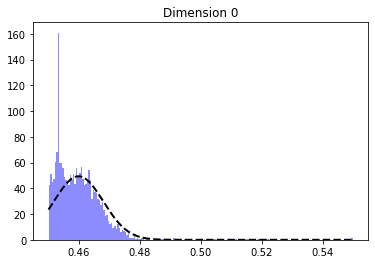

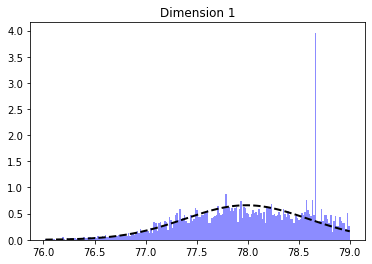

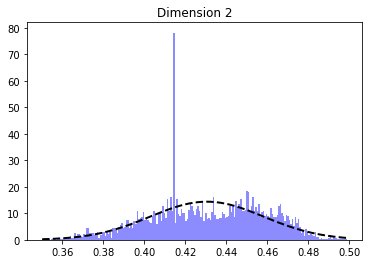

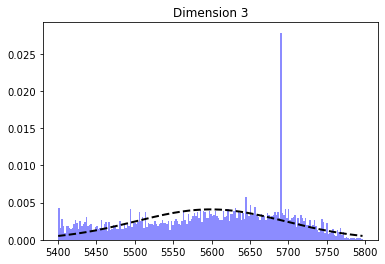

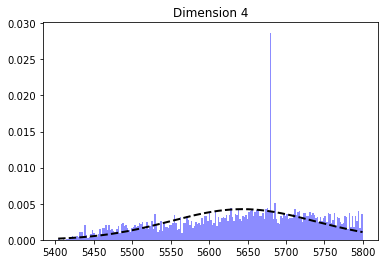

In [12]:
adjpars = ['requiv@primary', 'incl@orbit', 'q@binary', 'teff@primary', 'teff@secondary']
priors = [(0.45,0.55), (76.0, 79.0), (0.35, 0.5), (5400, 5800), (5400., 5800.)]
nwalkers = 20
niters = 1000
state = None

import time

time1 = time.time()
postion = run(adjpars, priors, nwalkers, niters)
time2 = time.time()

100%|██████████| 310/310 [00:10<00:00, 29.60it/s]


it is error


100%|██████████| 310/310 [00:10<00:00, 30.02it/s]


it is error


Text(0, 0.5, 'Flux')

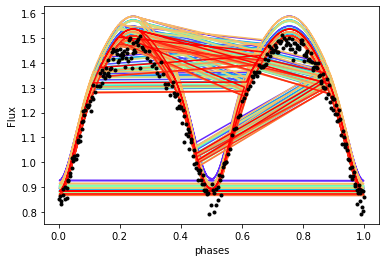

In [13]:
from matplotlib.pyplot import cm 

mod = b
position = postion
times = lc[:,0]
color=cm.rainbow(np.linspace(0,1,nwalkers))

for i,c in zip(range(nwalkers),color):
    
    mod['requiv@primary'] = position[-1-i,0]
    mod['incl@binary@orbit@component'] = position[-1-i,1]
    mod['q@binary'] = position[-1-i,2]
    mod['teff@primary'] = position[-1-i,3]
    mod['teff@secondary'] = position[-1-i,4]
    try:
        mod.run_compute(model='run{}'.format(i))
    except:
        print('it is error')


for i,c in zip(range(nwalkers),color):
    try:
        model = mod['fluxes@run{}'.format(i)].interp_value(times=times)

    #plt.figure(1)
        plt.plot(times,model,c=c)
    except:
        print('it is error')
    
plt.plot(times,lc[:,1],"k.")
plt.xlabel("phases")
plt.ylabel("Flux")


In [14]:
mod['incl@binary@orbit@component']

<Parameter: incl=78.60267680931409 deg | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [15]:
mod['q@binary']

<Parameter: q=0.41447774824340927 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [16]:
mod['teff@primary']

<Parameter: teff=5460.278439003601 K | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [17]:
mod['teff@secondary']

<Parameter: teff=5522.636939128773 K | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error


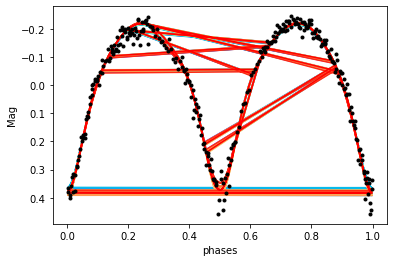

In [18]:
from matplotlib.pyplot import cm 

mod = b
position = postion
times = lc[:,0]
color=cm.rainbow(np.linspace(0,1,nwalkers))

for i,c in zip(range(nwalkers),color):
    
    mod['requiv@primary'] = position[-1-i,0]
    mod['incl@binary@orbit@component'] = position[-1-i,1]
    mod['q@binary'] = position[-1-i,2]
    mod['teff@primary'] = position[-1-i,3]
    mod['teff@secondary'] = position[-1-i,4]
    try:
        mod.run_compute(model='run{}'.format(i))
    except:
        print('it is error')


for i,c in zip(range(nwalkers),color):
    try:
        model = mod['fluxes@run{}'.format(i)].interp_value(times=times)

    #plt.figure(1)
        rmodel = -2.5*np.log10(model)
        resultmodel = rmodel-np.mean(rmodel)
        plt.plot(times,resultmodel,c=c)
    except:
        print('it is error')

lmodel = -2.5*np.log10(lc[:,1])  
lmag = lmodel-np.mean(lmodel)
ax = plt.gca()
plt.plot(times,lmag,"k.")
plt.xlabel("phases")
plt.ylabel("Mag")
ax.yaxis.set_ticks_position('left')
ax.invert_yaxis()